# GESTION DE PORTEFEUILLE - Assignement 1


#### Hugo Lamarre - HEC Montréal
#### Hiver 2023

### Etudiants

CARON Sébastien  - 11271997 

LEPEYTRE Vincent - 11237013

NONGUIERMA Harold  - 11229979

TOURÉ Ousmane  - 11220511

In [1]:
import importlib
import numpy as np
import Functions as f

importlib.reload(f)


import numpy as np
import pandas as pd
from scipy import optimize
import scipy.optimize as sco



#### Data Importation

In [2]:
# Path to change :

path_data = r"C:\Users\admin\Desktop\Gestion ptf (cours)\TP1_part1\seb_version\48_Industry_Portfolios.csv"
path_rf = r"C:\Users\admin\Desktop\Gestion ptf (cours)\TP1_part1\seb_version\SOFR30DAYAVG.xls"
path_regression = r"C:\Users\admin\Desktop\Gestion ptf (cours)\TP1_part1\iShares MSCI USA Factor ETF bis1.xlsx"

In [3]:
### Industries selected : 

Data_select1_names = ['Mines','Guns','Hshld','Oil','Txtls']

Data_select2_names = ['Mines','Guns','Hshld','Oil','Txtls','Agric', 'Util', 'Chems', 'Drugs', 'Telcm']

In [4]:
### Monthly data on 48 Industry Portfolios from Ken French’s website

Data = f.Load_ind_data(path_data)["Data"]
Data = Data[Data.index >= '2000-01'] # We keep only the data after 2000

Data_select = Data[Data_select1_names]

Industrie_selected = Data_select.columns


C:\Users\admin\Gestion_PTF\Final\Functions.py:26: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda x: pd.datetime.strptime(x,'%Y%m')


In [5]:
### Risk free asset : 30-Day Average SOFR, Percent, Daily, Not Seasonally Adjusted

Expected_Risk_free = f.Load_rf(path_rf)/100


In [6]:
### Data for the determination of expected returns :

Variable_regression = f.Load_lasso_variable(path_regression)

## Determination of expected returns
### Multiple linear regression with regularization by lasso method :

#### 1/ Data set split betwen  train and test set : 

In [7]:
# Data use for the split : 

First_factor_obs = '2013-09-01'
Date_train = '2020-01-01' # Train set end
Date_test = '2021-06-01' # Test set beginning 
Last_date = '2022-12-01'

Variable_regression = Variable_regression[Variable_regression.index >= First_factor_obs]

Data_regression_lasso = f.Split_dataset(Data,Variable_regression,First_factor_obs,Date_train,Date_test,Last_date)

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])


#### 2/ Prediction : 

In [8]:
Resultat_prediction  = f.Lasso_regression(Data_regression_lasso)

#### 3/ Results : 

In [9]:
# Select only the prediction where the lasso approch perform better on the train set base on MSE ratio and R square

E_return_select = f.select_pred(Resultat_prediction, Data)

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)


In [10]:
E_return = E_return_select[Data_select1_names]

#### 4/ Performance of  prediction : 

In [11]:
# R_squared moyen (Train set) :
Resultat_prediction.loc['R_squared_train'].mean()

11.940722385675826

In [12]:
# R_squared moyen (Test set) :
R_T = Resultat_prediction.copy()
R_T = R_T.T
R_T= R_T[R_T['R_squared_test'] >= 0 ]
R_T = R_T[R_T['ratio_mse'] <= 1]
Performance_test_set= (R_T['R_squared_test'].sum())/len(Data.columns)
Performance_test_set

7.8449218915209755

In [13]:
# MSE lasso prediction / MSE with naive historical mean :
Resultat_prediction.loc['ratio_mse'].mean()

0.9109467292635324

## Determination of the covariance matrix :

In [14]:
## Covariance matrix for selection 1 of industries : 
E_cov_total = f.Ledoit_wolf(Data/100)

E_cov_1 = (E_cov_total[Data_select1_names].loc[Data_select1_names])

E_cov_2 = (E_cov_total[Data_select2_names].loc[Data_select2_names])

## Question 1
### (a) Graph the mean-variance frontier without risk-free asset of the selected 5 industry portfolios.
Display each industry portfolio in the chart.

#### Estimation of the covariance-matrix and expected return   :

In [15]:
Nbr_PTF = 100
K = 5 #On veut 5 Assets

##### Determination of the optimal  portfolio  for a given return (with Short Sell) :

Restricted license - for non-production use only - expires 2024-10-28


<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

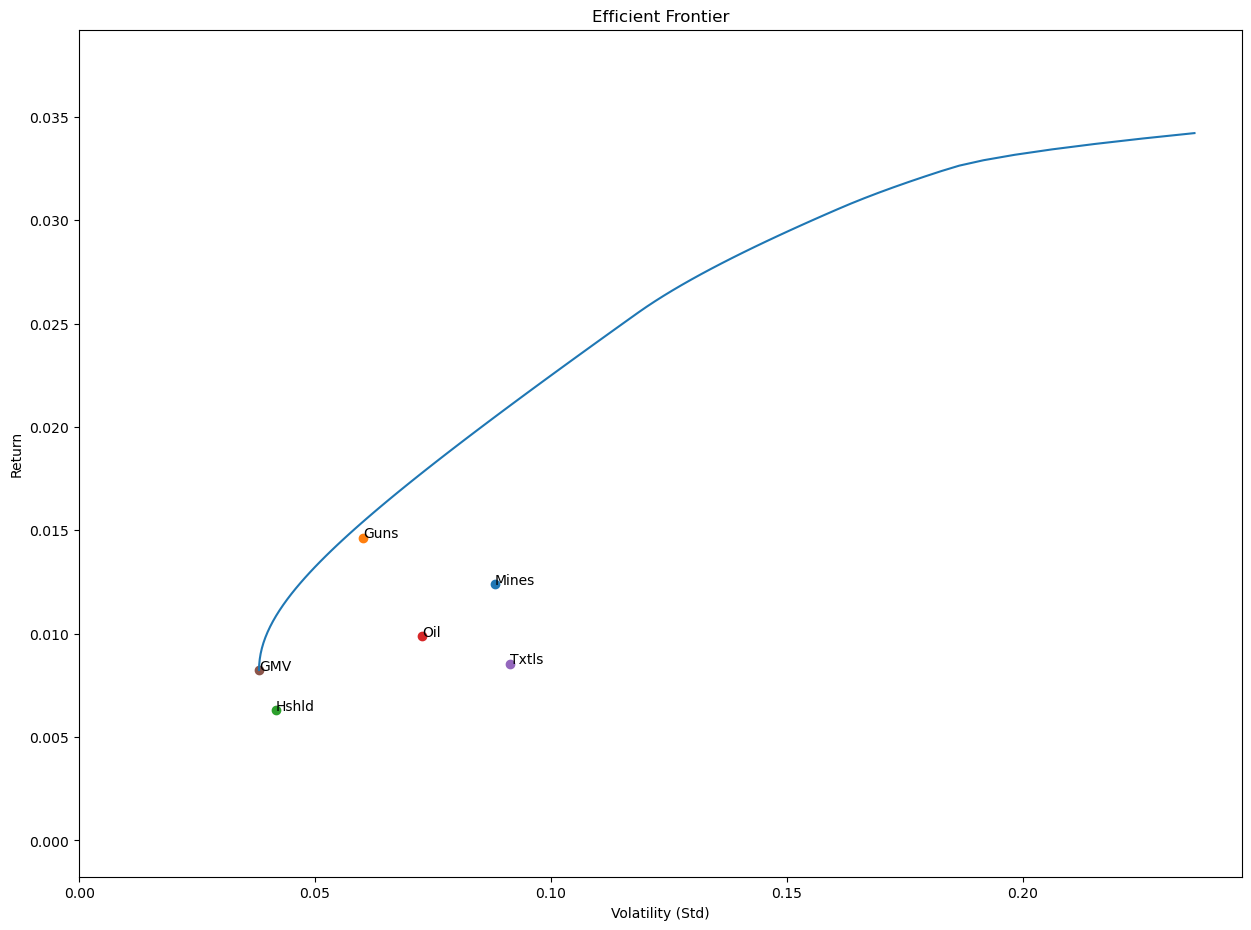

In [16]:
f.plot_ef_Gurobi(E_return, E_cov_1, Expected_Risk_free, K, Nbr_PTF, bounds = (-2,2), show_cml=False, show_gmv=True)

### (b) Graph the mean-variance frontier with risk-free asset of the selected 5 industry portfolios. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the introduction of a risk-free asset.



<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

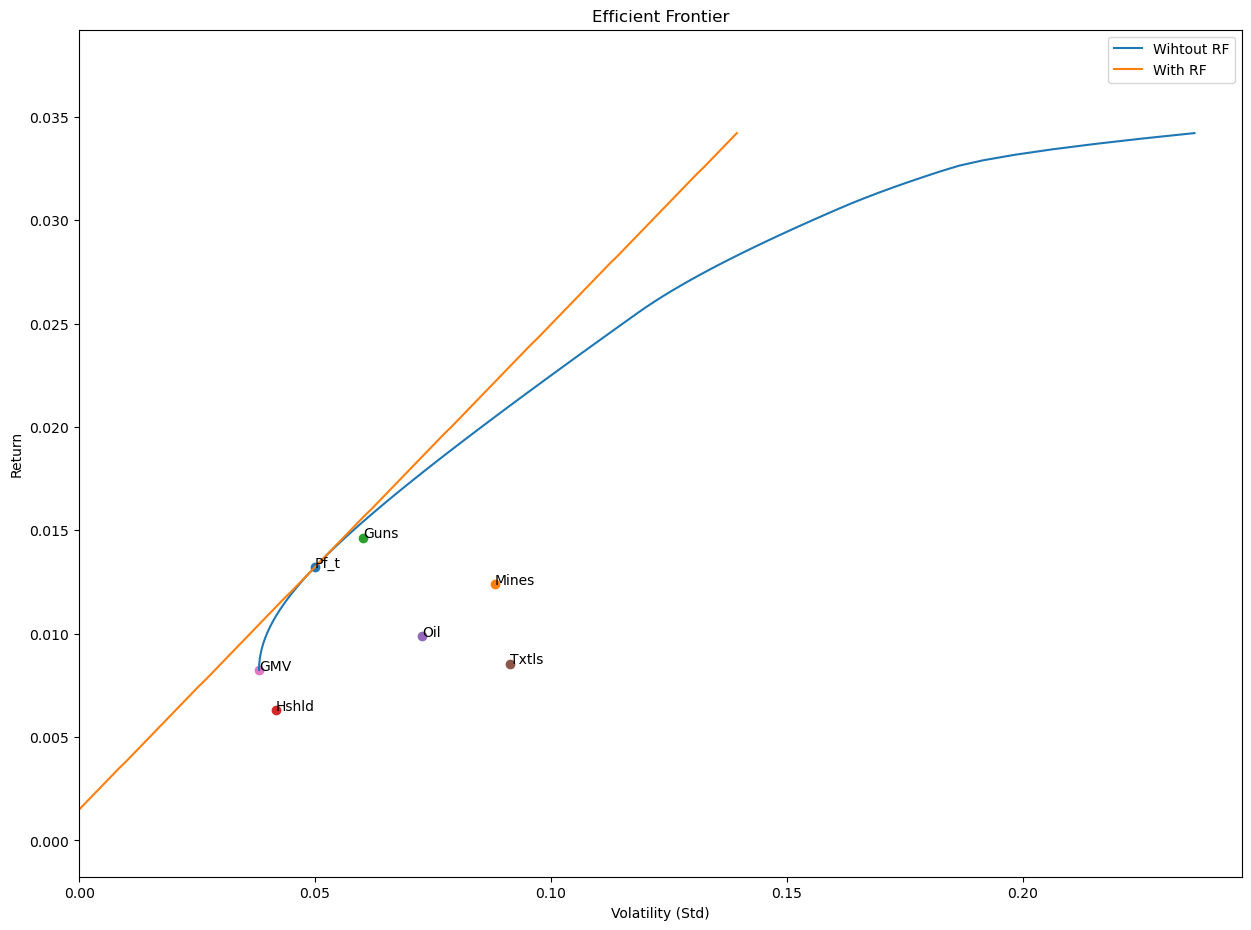

In [17]:
f.plot_ef_Gurobi(E_return, E_cov_1, Expected_Risk_free, K , Nbr_PTF, bounds = (-2,2), show_cml=True, show_gmv=True)

#### Explanations: 

### (c) Describe the tangent portfolio and its characteristics such as its mean and variance and the weights of each asset


In [18]:
result = f.tangent_Gurobi(E_return, E_cov_1, Expected_Risk_free, K , Nbr_PTF = 100, bounds= (-2,2))
result


,Mines,Guns,Hshld,Oil,Txtls,Return,Volatility,Sharpe
19,0.1862,0.7213,0.2135,0.042,-0.163,0.013227,0.05,0.234678


### (d) Graph the mean-variance frontier without risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.



<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

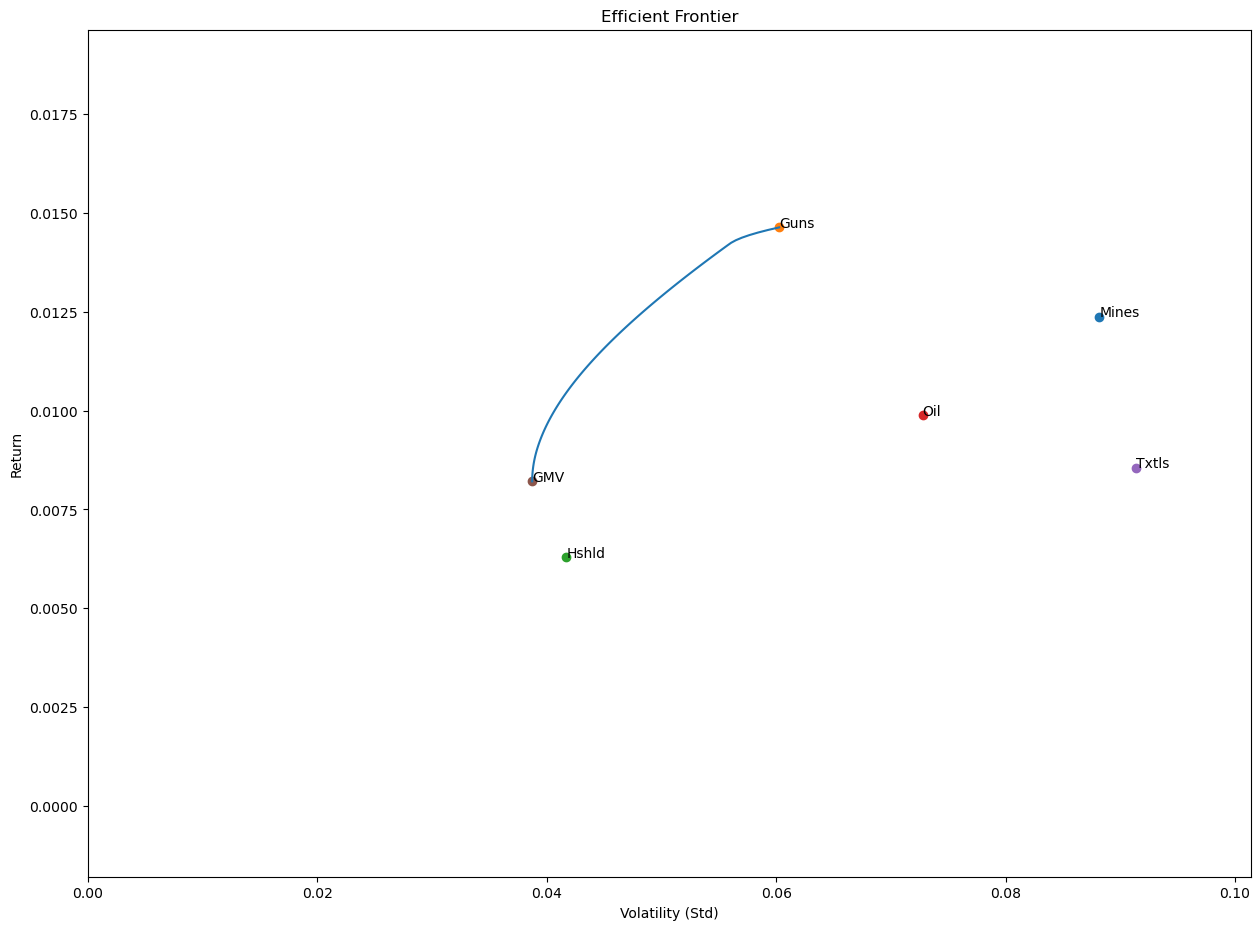

In [19]:
f.plot_ef_Gurobi(E_return, E_cov_1, Expected_Risk_free, K , Nbr_PTF, bounds = (0, 1), show_cml=False, show_gmv=True)

#### Explain how the mean-variance frontier has changed with the constraint: (To continue)

### (e) Graph the mean-variance frontier with risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.


<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

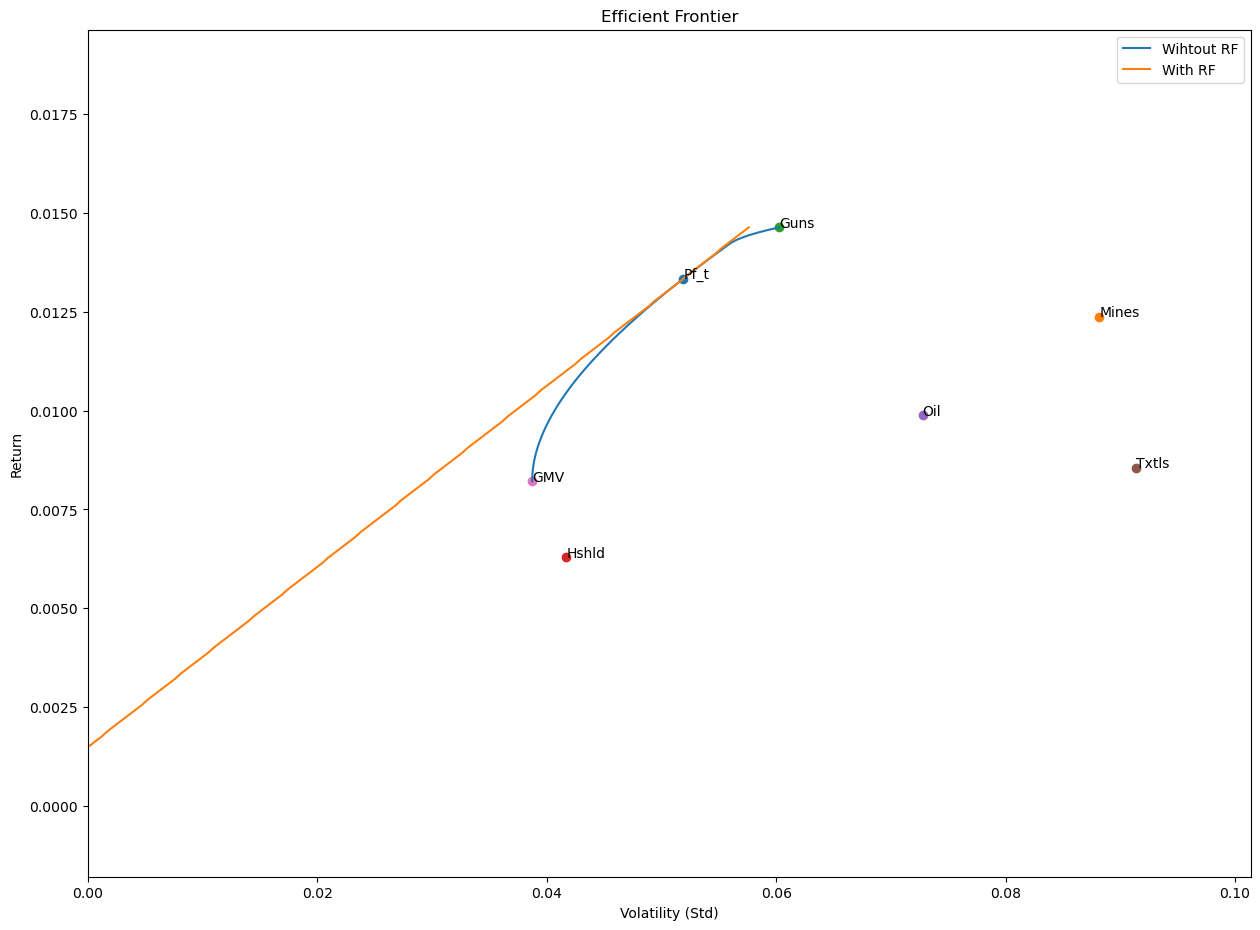

In [20]:
f.plot_ef_Gurobi(E_return, E_cov_1, Expected_Risk_free, K , Nbr_PTF, bounds = (0, 1), show_cml=True, show_gmv=True)

#### Explain how the mean-variance frontier has changed with the constraint:

(To Continue)

### (f) Can you find a tangent portfolio under short-sale constraints? If so, describe its characteristics such as its mean and variance and the weights of each asset. Explain how the tangent portfolio has changed with the constraint

In [21]:
result = f.tangent_Gurobi(E_return, E_cov_1, Expected_Risk_free, K , Nbr_PTF = 100, bounds= (0,1))
result



,Mines,Guns,Hshld,Oil,Txtls,Return,Volatility,Sharpe
79,0.152,0.726,0.1047,0.0172,0.0,0.013337,0.051889,0.228262


Explain:

### (g) Repeat the same calculations in (a)-(f) adding 5 other industry portfolios to the original list of 5 industry portfolios you chose at the start. Compare the results and discuss the advantages and disadvantages of using 10 portfolios instead of 5.

In [22]:
Data_select2 = Data[Data_select2_names]

E_return_2 = E_return_select[Data_select2_names]

Nbr_PTF = 100
K = 10

#### g-(a) Graph the mean-variance frontier without risk-free asset of the selected 10 industry portfolios.

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

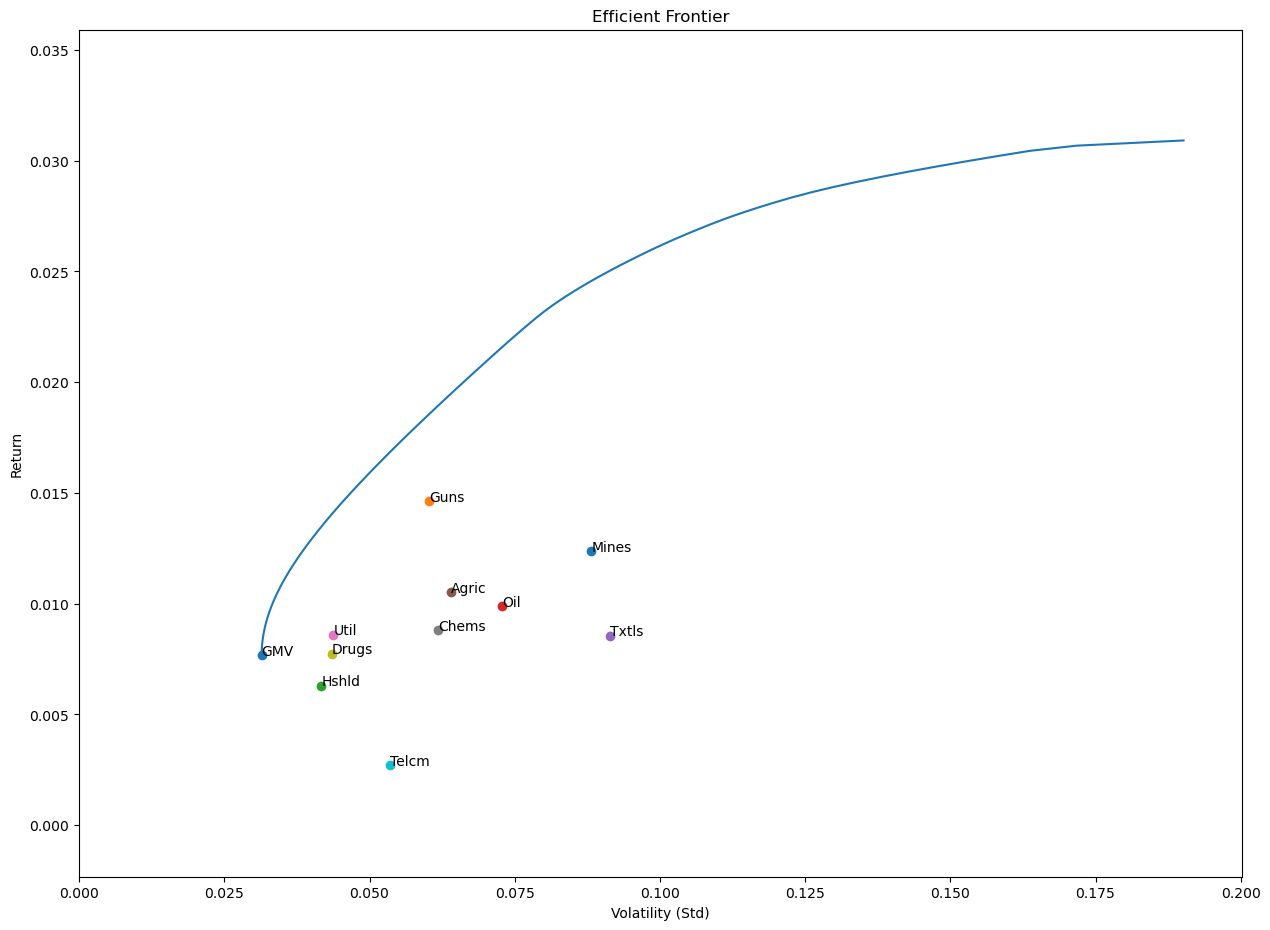

In [23]:
f.plot_ef_Gurobi(E_return_2, E_cov_2, Expected_Risk_free, K, Nbr_PTF, bounds = (-1,1), show_cml=False, show_gmv=True)

#### g-(b) Graph the mean-variance frontier with risk-free asset of the selected 10 industry portfolios. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the introduction of a risk-free asset.

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

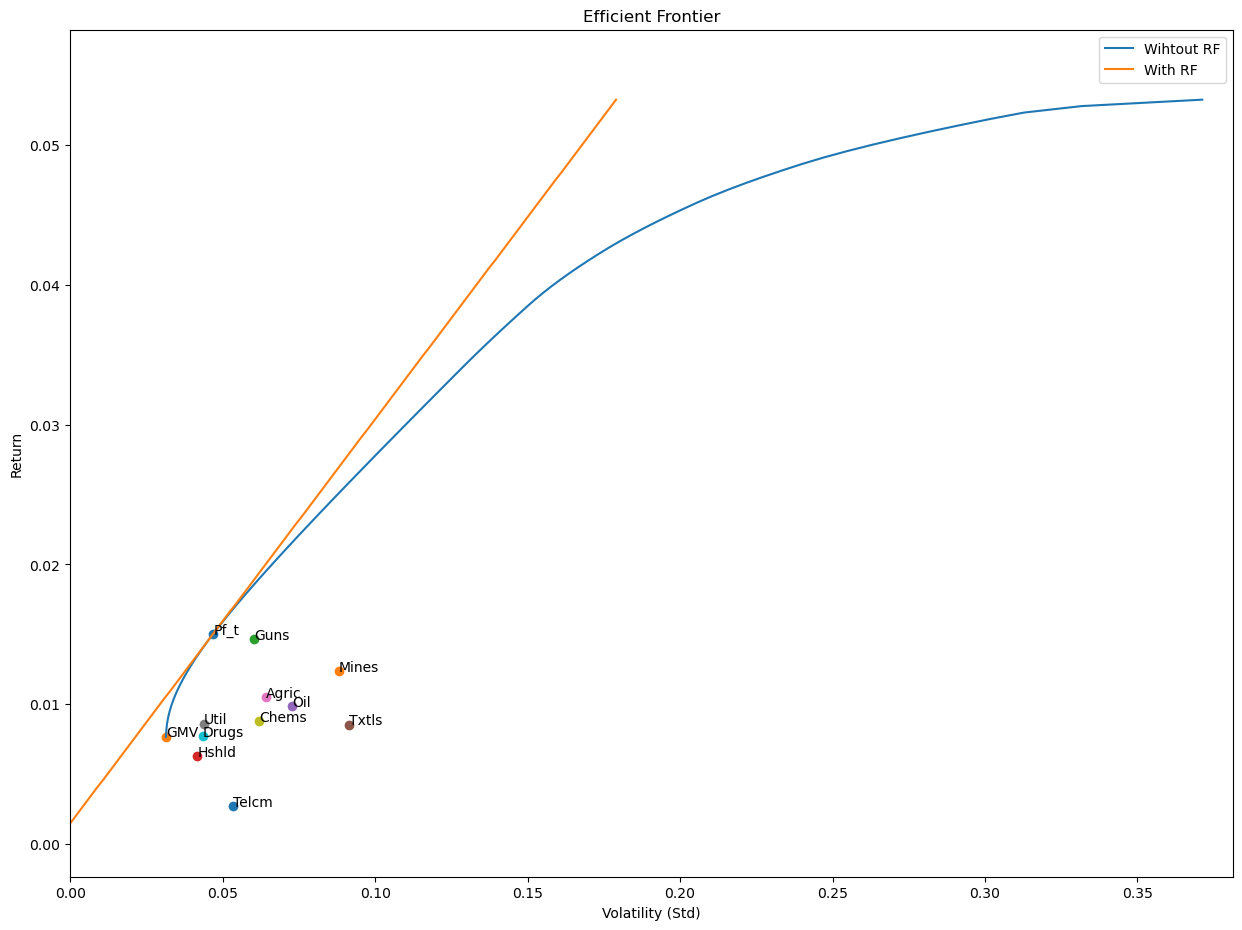

In [24]:
f.plot_ef_Gurobi(E_return_2, E_cov_2, Expected_Risk_free, K, Nbr_PTF, bounds = (-2,2), show_cml=True, show_gmv=True)

#### g-(c) Describe the tangent portfolio and its characteristics such as its mean and variance and the weights of each asset

In [25]:
result = f.tangent_Gurobi(E_return_2, E_cov_2, Expected_Risk_free, K , Nbr_PTF, bounds= (-2,2))

result

,Mines,Guns,Hshld,Oil,Txtls,Agric,Util,Chems,Drugs,Telcm,Return,Volatility,Sharpe
16,0.167,0.5157,0.0289,-0.0284,-0.044,0.2252,0.3484,-0.1488,0.4015,-0.4654,0.015033,0.046865,0.28892


#### g-(d) Graph the mean-variance frontier without risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

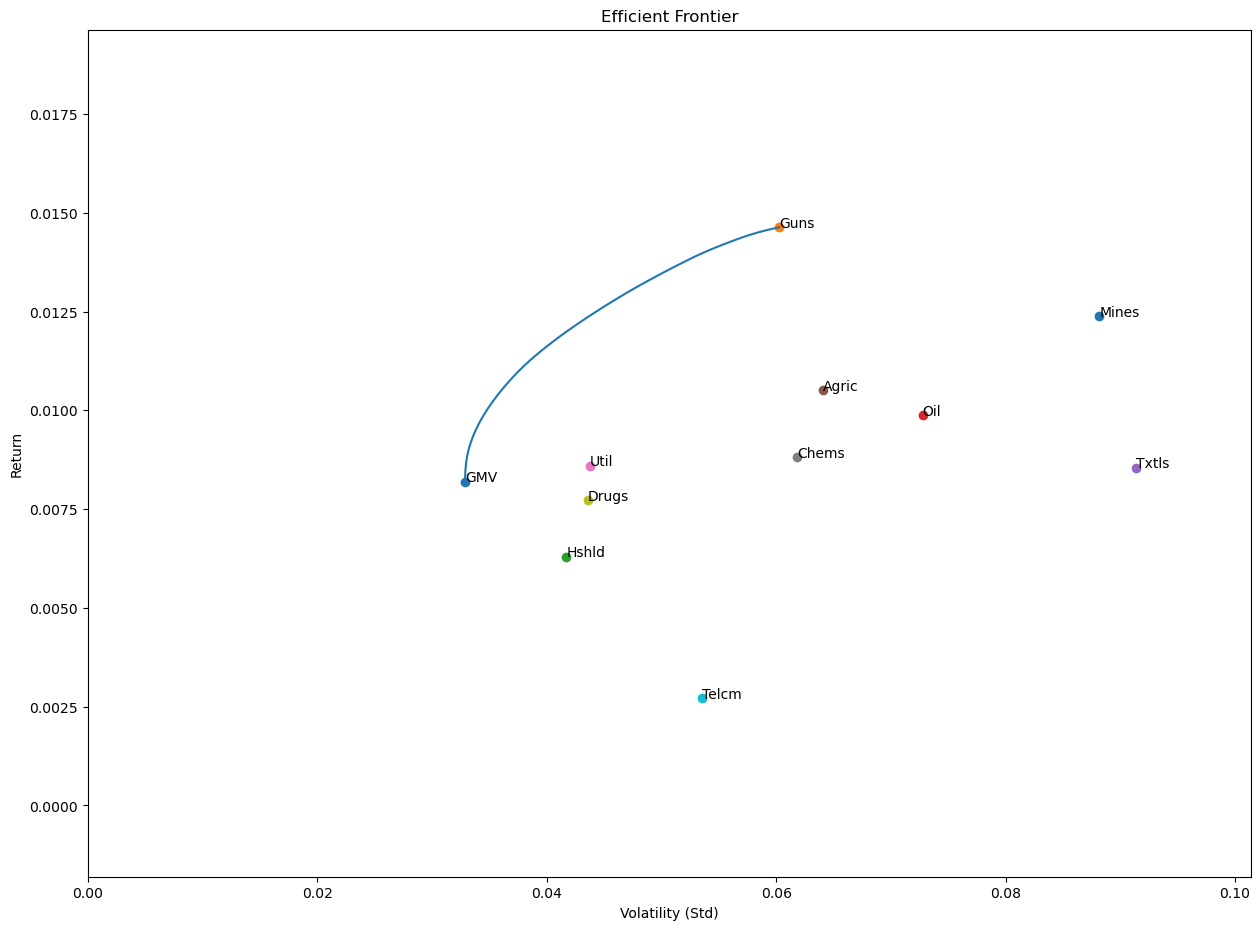

In [26]:
f.plot_ef_Gurobi(E_return_2, E_cov_2, Expected_Risk_free, K, Nbr_PTF, bounds = (0,1), show_cml=False, show_gmv=True)

#### g-(e) Graph the mean-variance frontier with risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

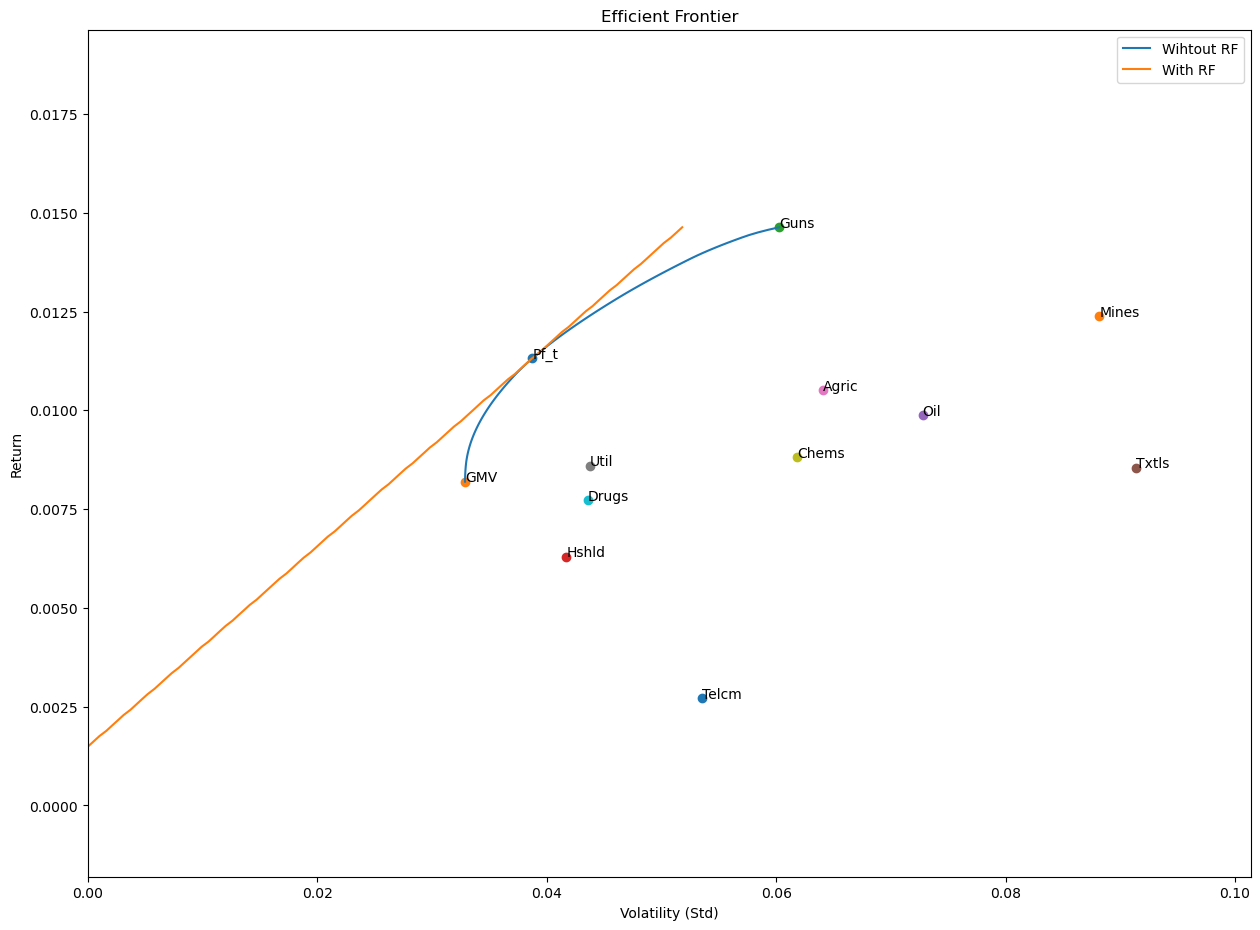

In [27]:
f.plot_ef_Gurobi(E_return_2, E_cov_2, Expected_Risk_free, K, Nbr_PTF, bounds = (0,1), show_cml=True, show_gmv=True)

#### g-(f) Can you find a tangent portfolio under short-sale constraints? If so, describe its characteristics such as its mean and variance and the weights of each asset. Explain how the tangent portfolio has changed with the constraint

In [28]:
result = f.tangent_Gurobi(E_return_2, E_cov_2, Expected_Risk_free, K , Nbr_PTF, bounds= (0,1))

result

,Mines,Guns,Hshld,Oil,Txtls,Agric,Util,Chems,Drugs,Telcm,Return,Volatility,Sharpe
48,0.0015,0.4247,0.0,0.0,0.0,0.1513,0.2611,0.0,0.1615,0.0,0.011318,0.038739,0.253635


### (h) The investment policy statement now limits you to invest in up to 3 industry portfolios from the original list of 5 industry portfolios. Repeat the same calculations in (a)-(f) with this additional constraint on the maximum number of assets. Is the optimal combination of assets the same for every target expected return?

In [29]:
Nbr_PTF = 100
K=3

#### h-(a) Graph the mean-variance frontier without risk-free asset of the selected 3 industry portfolios. vs 5


<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

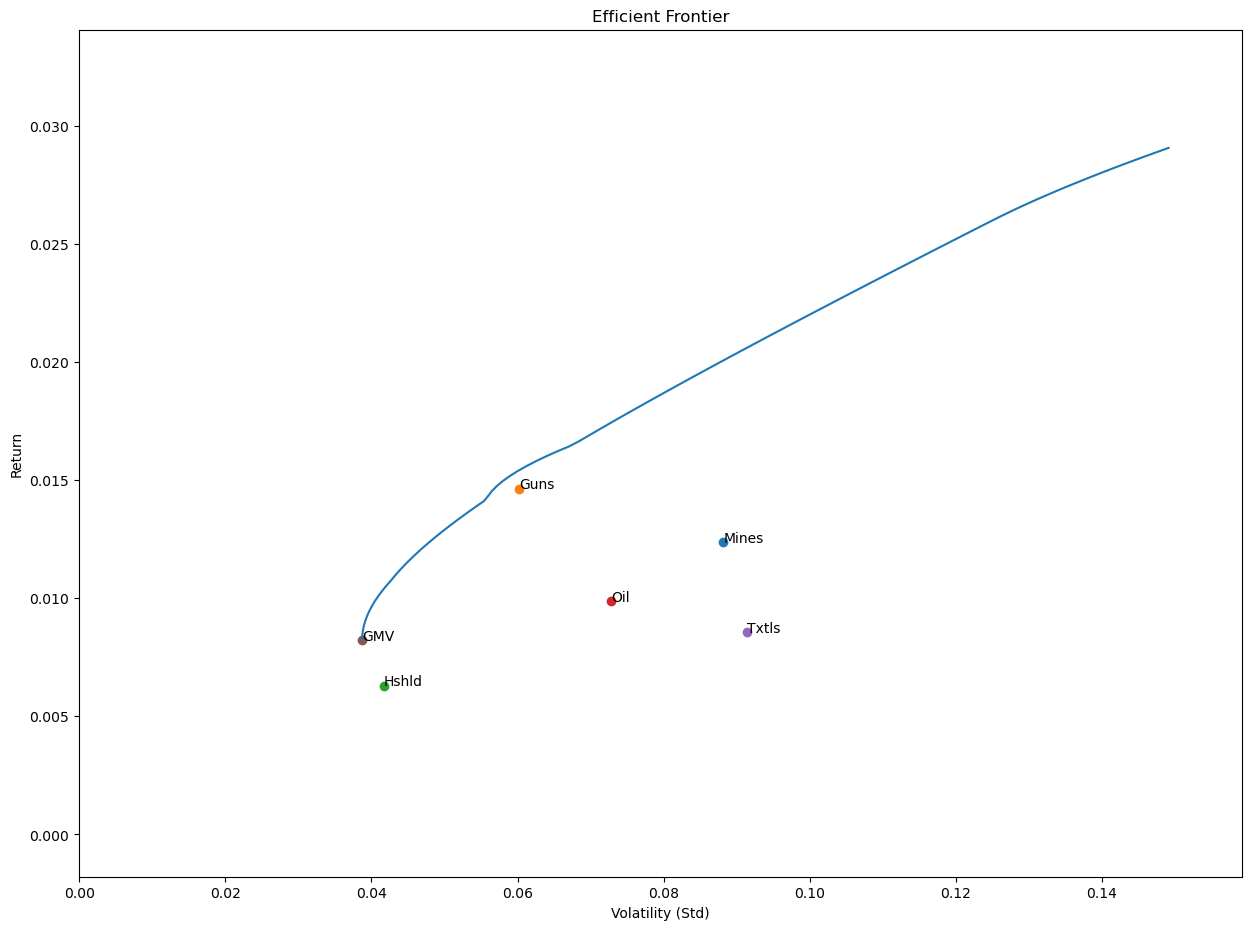

In [30]:
f.plot_ef_Gurobi(E_return, E_cov_1, Expected_Risk_free, K, Nbr_PTF, bounds = (-2,2), show_cml=False, show_gmv=True)



#### h-(b) Graph the mean-variance frontier with risk-free asset of the selected 3 industry portfolios. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the introduction of a risk-free asset.

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

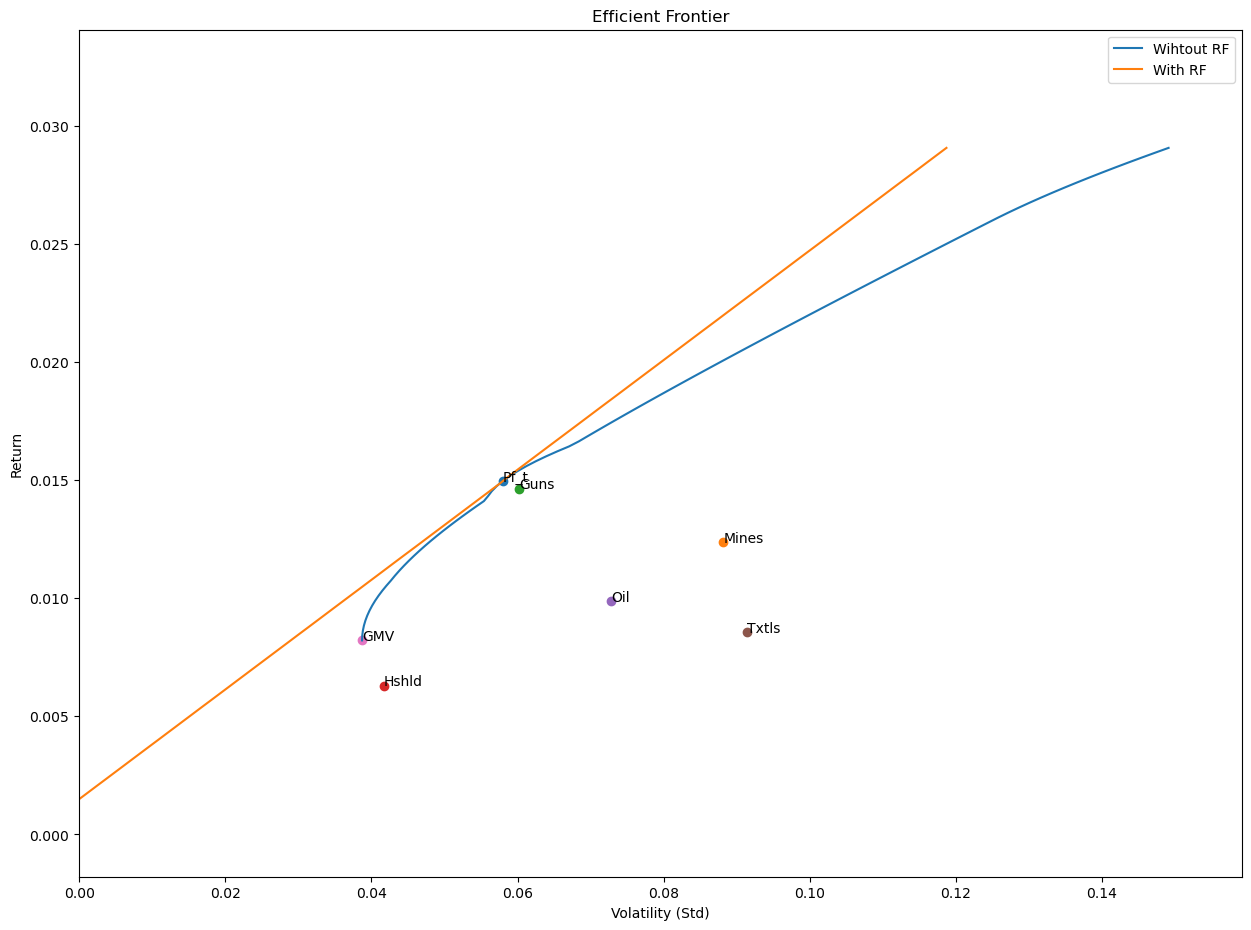

In [31]:
f.plot_ef_Gurobi(E_return, E_cov_1, Expected_Risk_free, K, Nbr_PTF, bounds = (-2,2), show_cml=True, show_gmv=True)

#### h-(c) Describe the tangent portfolio and its characteristics such as its mean and variance and the weights of each asset

In [32]:
#Trouver portefeuille maximum sharp ratio (Regler probleme de la fonction ou expliquer)
result = f.tangent_Gurobi(E_return, E_cov_1, Expected_Risk_free, K, Nbr_PTF, bounds= (-2,2))
result


,Mines,Guns,Hshld,Oil,Txtls,Return,Volatility,Sharpe
32,0.257,0.8896,0.0,0.0,-0.1467,0.014947,0.057949,0.232178


<AxesSubplot:xlabel='Standard_deviation'>

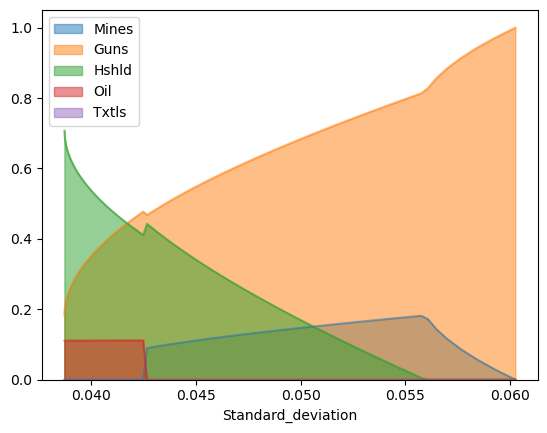

In [33]:

f.areaplot(E_return, E_cov_1, K, Nbr_PTF, bounds=(0,1))

<AxesSubplot:xlabel='Standard_deviation'>

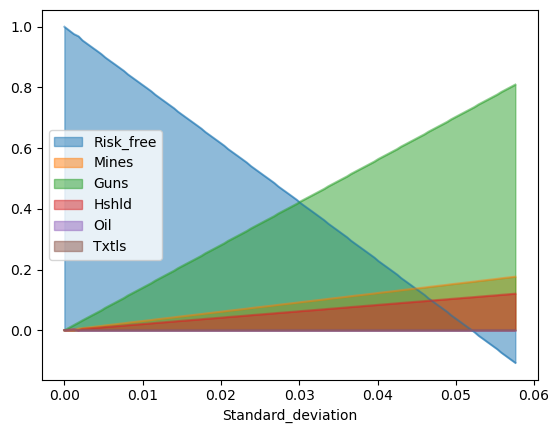

In [34]:
f.areaplot_wrf(E_return, E_cov_1, K, Expected_Risk_free, Nbr_PTF, bounds=(0,1))

#### h-(d) Graph the mean-variance frontier without risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

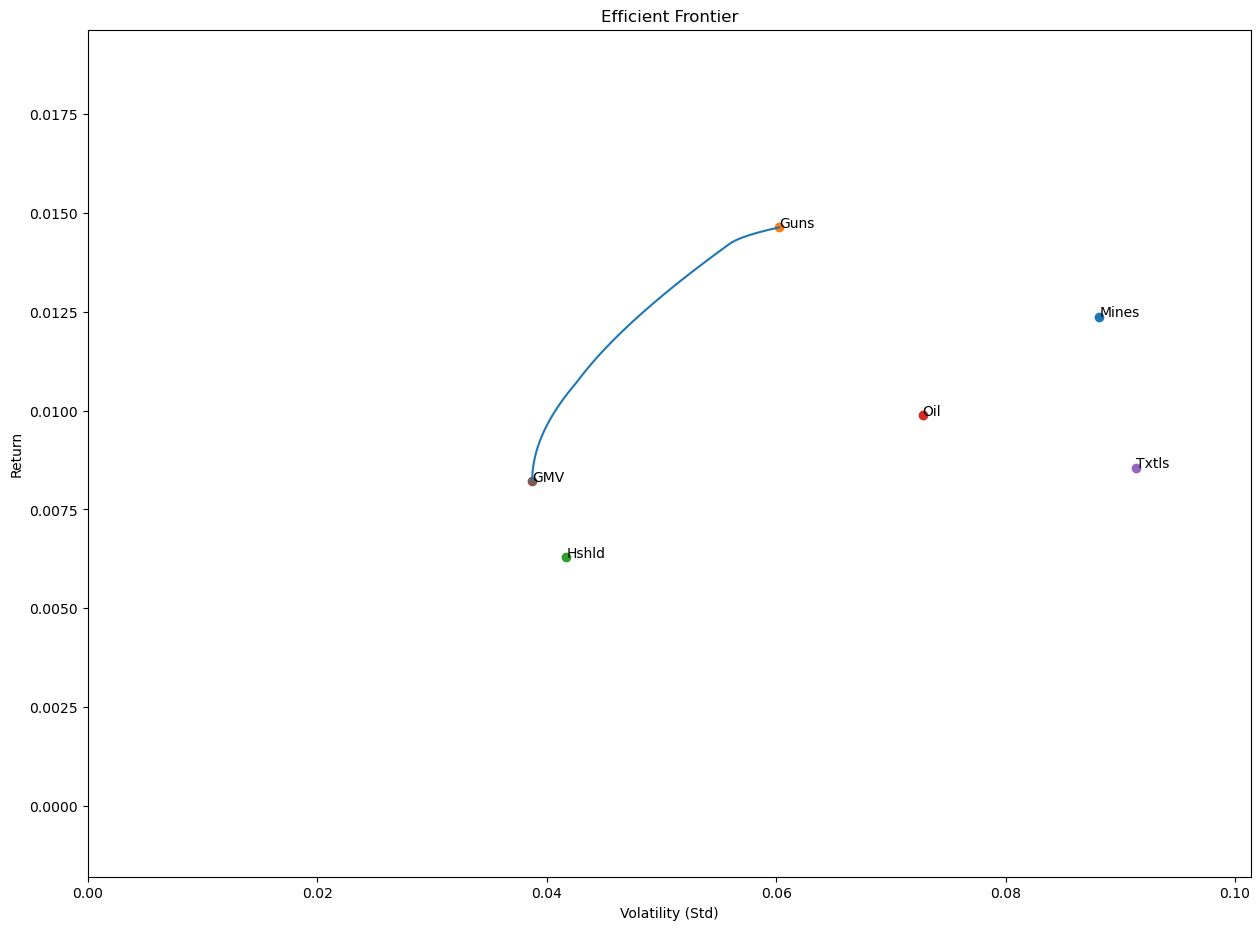

In [35]:
f.plot_ef_Gurobi(E_return, E_cov_1, Expected_Risk_free, K, Nbr_PTF, bounds = (0,1), show_cml=False, show_gmv=True)

#### h-(e) Graph the mean-variance frontier with risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

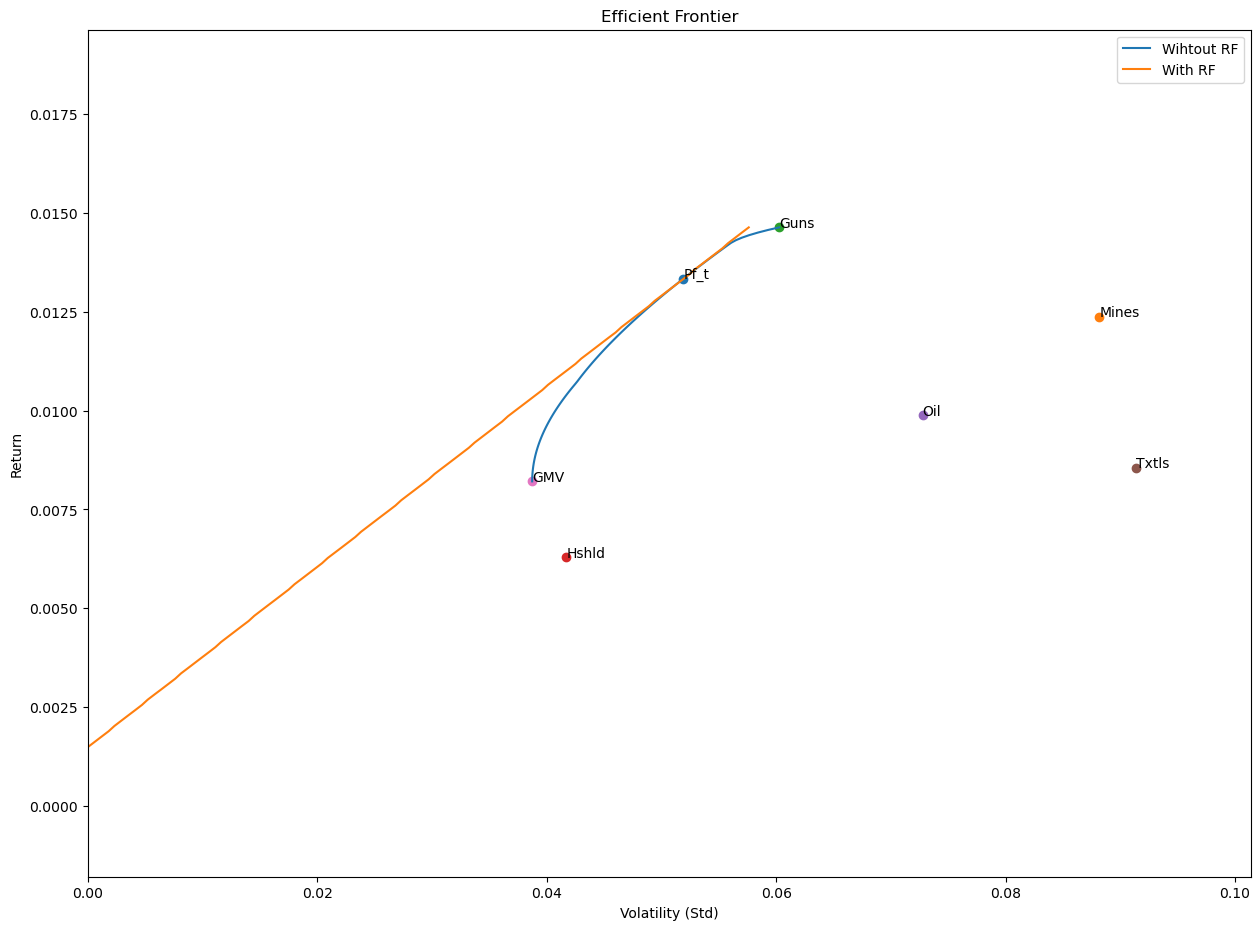

In [36]:
f.plot_ef_Gurobi(E_return, E_cov_1, Expected_Risk_free, K, Nbr_PTF, bounds = (0,1), show_cml=True, show_gmv=True)

#### h-(f) Can you find a tangent portfolio under short-sale constraints? If so, describe its characteristics such as its mean and variance and the weights of each asset. Explain how the tangent portfolio has changed with the constraint

In [37]:
#Trouver portefeuille maximum sharp ratio
result = f.tangent_Gurobi(E_return, E_cov_1, Expected_Risk_free, K, Nbr_PTF, bounds= (0,1))
result


,Mines,Guns,Hshld,Oil,Txtls,Return,Volatility,Sharpe
79,0.1589,0.7284,0.1127,0.0,0.0,0.013337,0.051899,0.228219


<AxesSubplot:xlabel='Standard_deviation'>

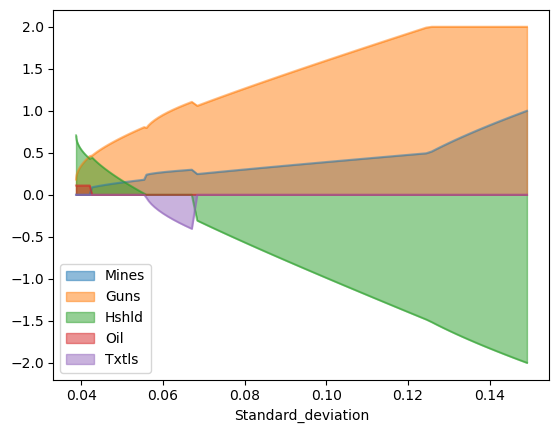

In [38]:
f.areaplot(E_return, E_cov_1, K, Nbr_PTF, bounds=(-2,2))

<AxesSubplot:xlabel='Standard_deviation'>

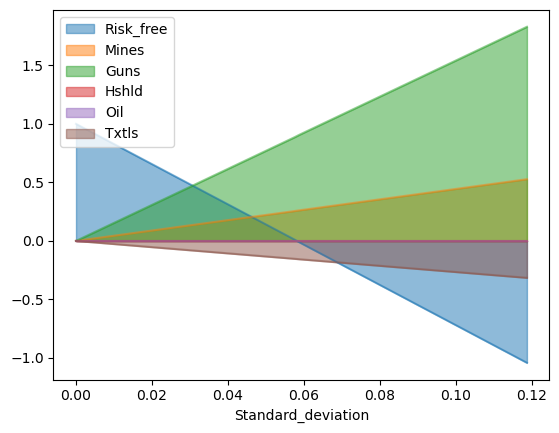

In [39]:
#Axis gauche pondération
f.areaplot_wrf(E_return, E_cov_1, K, Expected_Risk_free, Nbr_PTF, bounds=(-2,2))

## Question 2

### (a) Implement the portfolio resampling approach to demonstrate the effect of estimation uncertainty on the mean-variance frontier and tangent portfolios computed in Question 1.

### (a-1) Graph the mean-variance frontier without risk-free asset of the selected 5 industry portfolios.¶Display each industry portfolio in the chart.

In [88]:
Nsim=100
Nbr_PTF = 100
K = 5 #On veut 5 Assets
Resample1=f.boostrap(Data_select,Nsim)#On genere nos simulation par Bootstraap

In [89]:
result1=f.resample_no_risk(E_return, E_cov_1,Resample1, K, Nbr_PTF,path_regression, bounds = (-2,2))
result2=f.resample_with_risk(E_return, E_cov_1,Resample1,Expected_Risk_free,K, Nbr_PTF,path_regression, bounds = (-2,2))

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:27

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:27

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:27

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:27

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:27

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

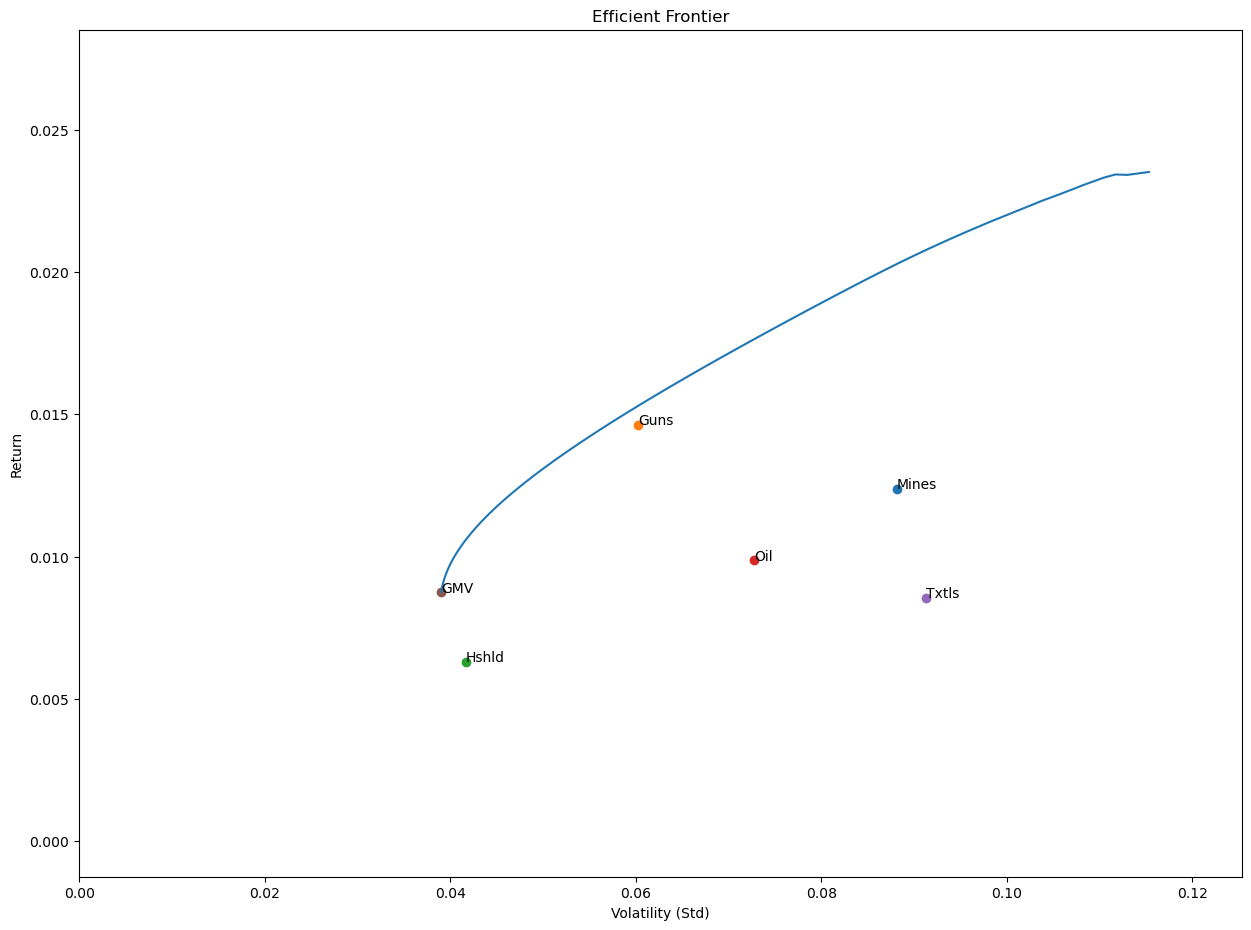

In [90]:
f.plot_Resample_ef_Gurobi(E_return, E_cov_1,result1,result2,Expected_Risk_free,show_cml=False, show_gmv=True)

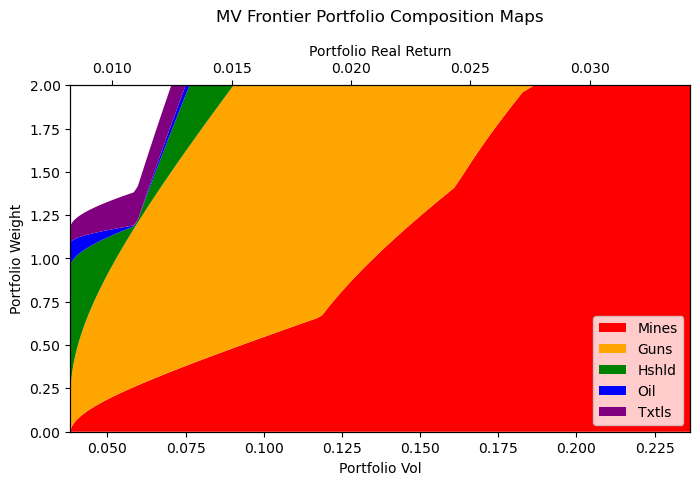

In [91]:
f.transition_map(E_return, E_cov_1,Expected_Risk_free, K, Nbr_PTF,bounds = (-2,2),no_risk=True)

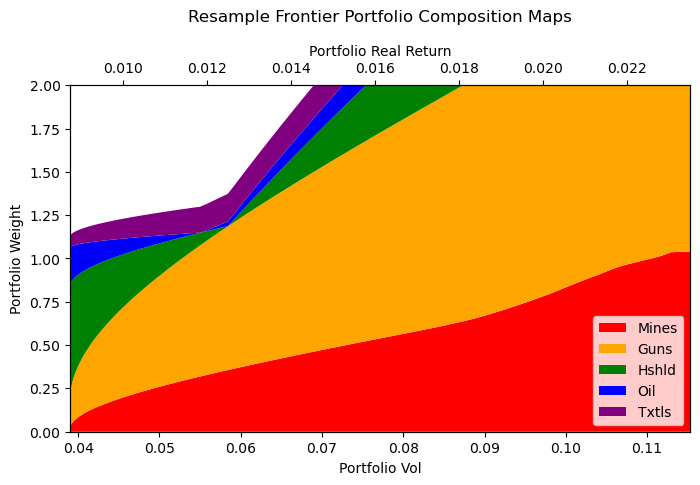

In [92]:
f.Resample_transition_map(result1,bounds = (-2,2))

### (a-1-b) Graph the mean-variance frontier with risk-free asset of the selected 5 industry portfolios. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the introduction of a risk-free asset.¶

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

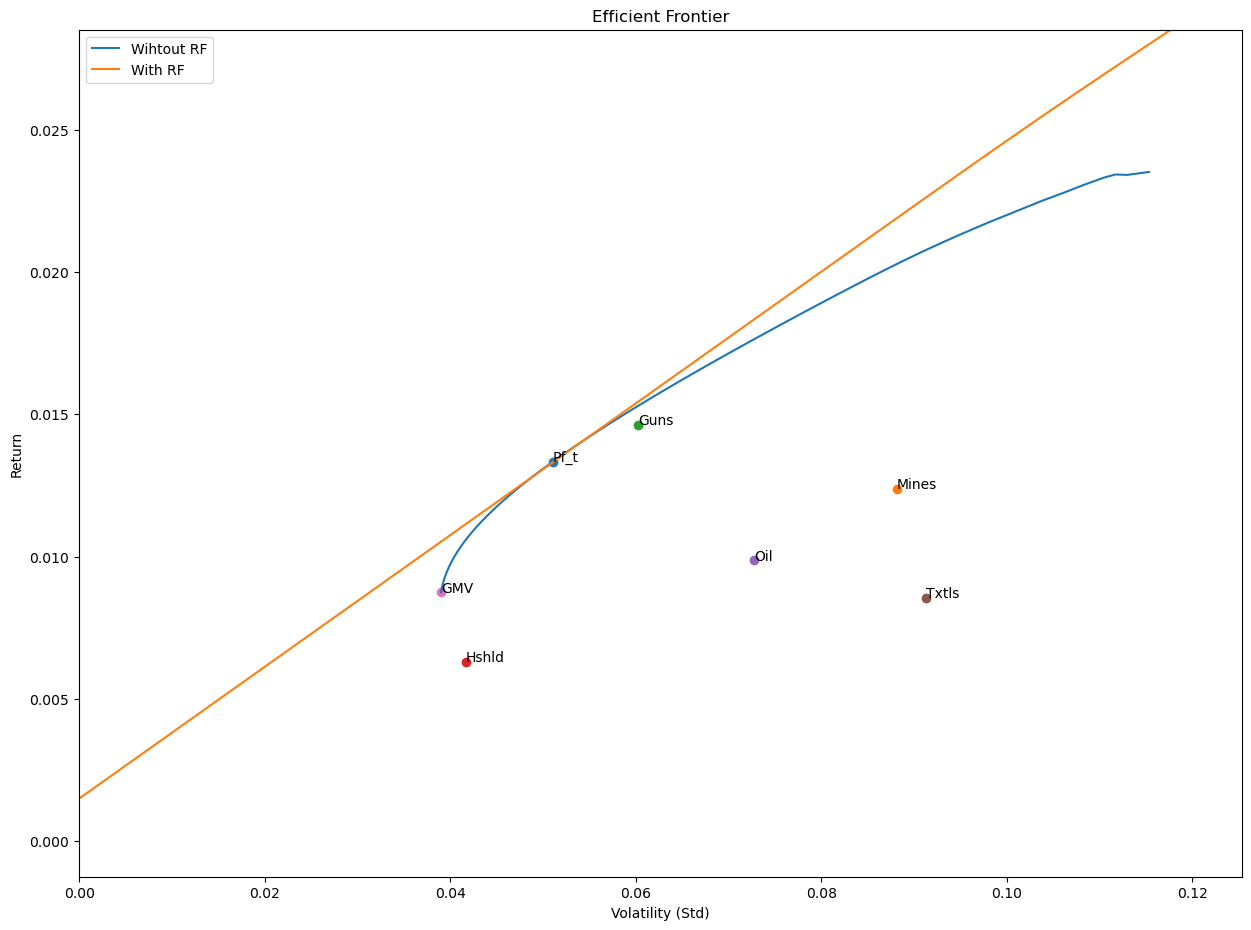

In [93]:
f.plot_Resample_ef_Gurobi(E_return, E_cov_1,result1,result2,Expected_Risk_free,show_cml=True, show_gmv=True)

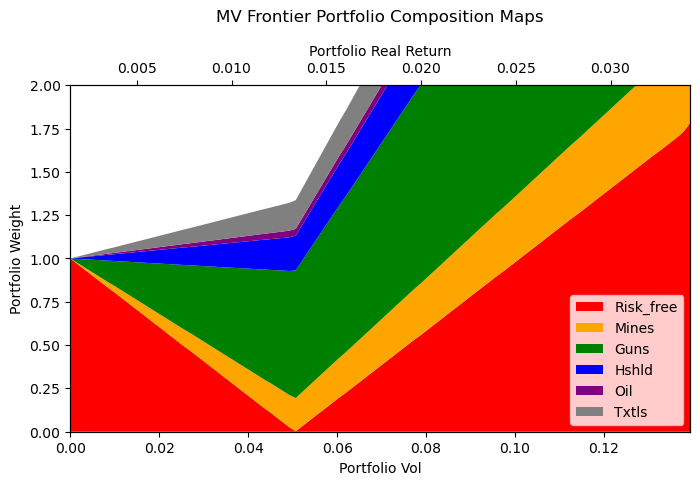

In [94]:
f.transition_map(E_return, E_cov_1,Expected_Risk_free, K, Nbr_PTF,bounds = (-2,2),no_risk=False)

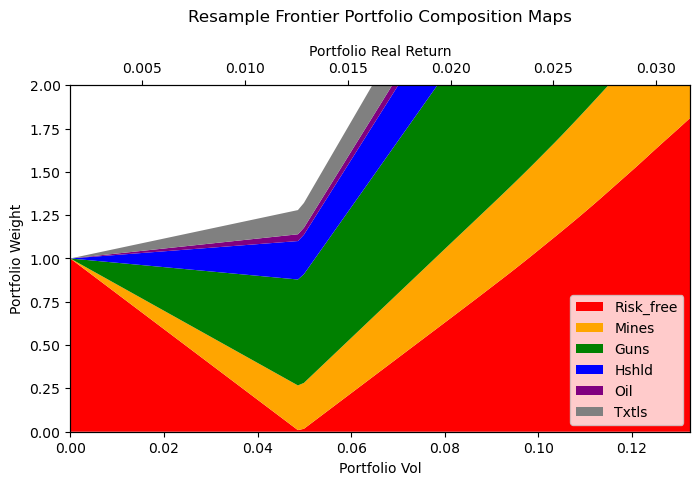

In [95]:
f.Resample_transition_map(result2, bounds = (-2,2))

### (a-1-c) Describe the tangent portfolio and its characteristics such as its mean and variance and the weights of each asset(a-1-c) Describe the tangent portfolio and its characteristics such as its mean and variance and the weights of each asset

In [96]:
result = f.tangent_resample(result1,Expected_Risk_free)
result


,Mines,Guns,Hshld,Oil,Txtls,Return,Volatility,Sharpe
26,0.272713,0.666743,0.161317,0.035419,-0.136191,0.013335,0.051065,0.231901


### (a-1-d) Graph the mean-variance frontier without risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.

In [97]:
result1=f.resample_no_risk(E_return, E_cov_1,Resample1, K, Nbr_PTF,path_regression, bounds = (0,1))
result2=f.resample_with_risk(E_return, E_cov_1,Resample1,Expected_Risk_free,K, Nbr_PTF,path_regression, bounds = (0,1))

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:27

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:27

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:27

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:27

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:27

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:27

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

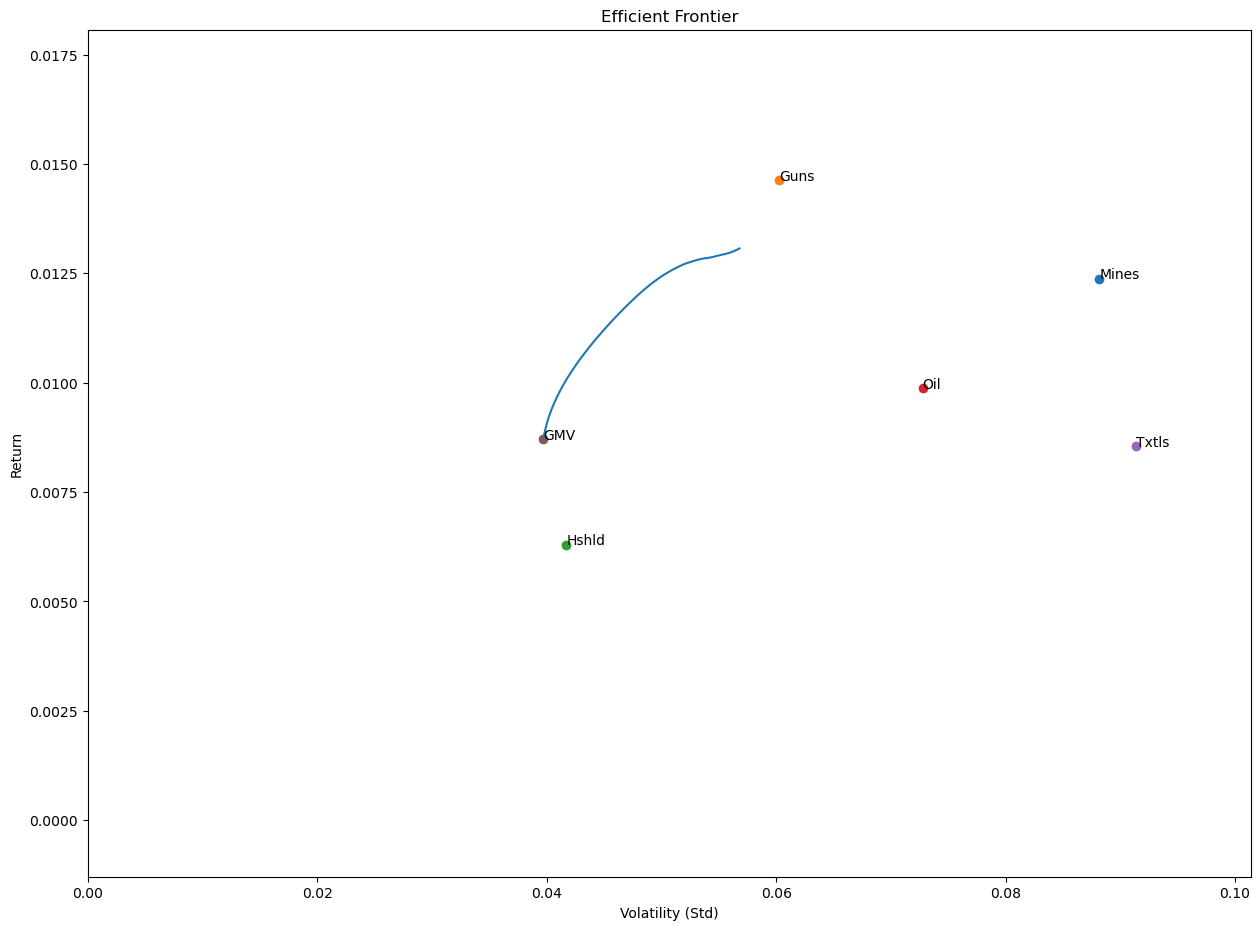

In [98]:
f.plot_Resample_ef_Gurobi(E_return, E_cov_1,result1,result2,Expected_Risk_free,show_cml=False, show_gmv=True)

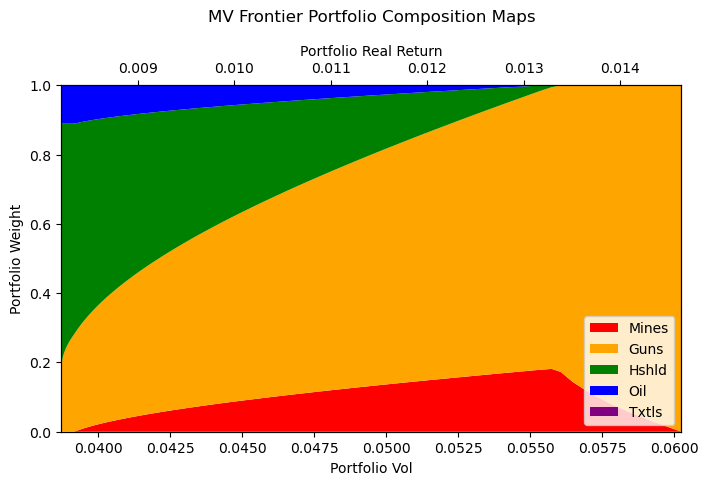

In [99]:
f.transition_map(E_return, E_cov_1,Expected_Risk_free, K, Nbr_PTF,bounds = (0,1),no_risk=True)

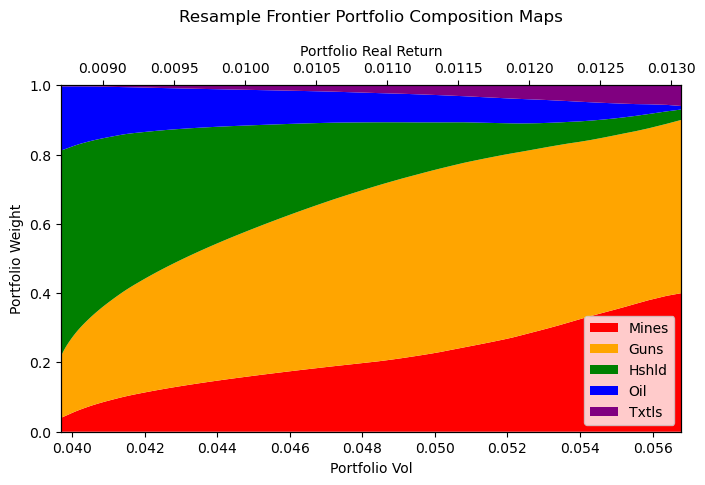

In [100]:
f.Resample_transition_map(result1, bounds = (0, 1))

### (a-1-e) Graph the mean-variance frontier with risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.¶

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

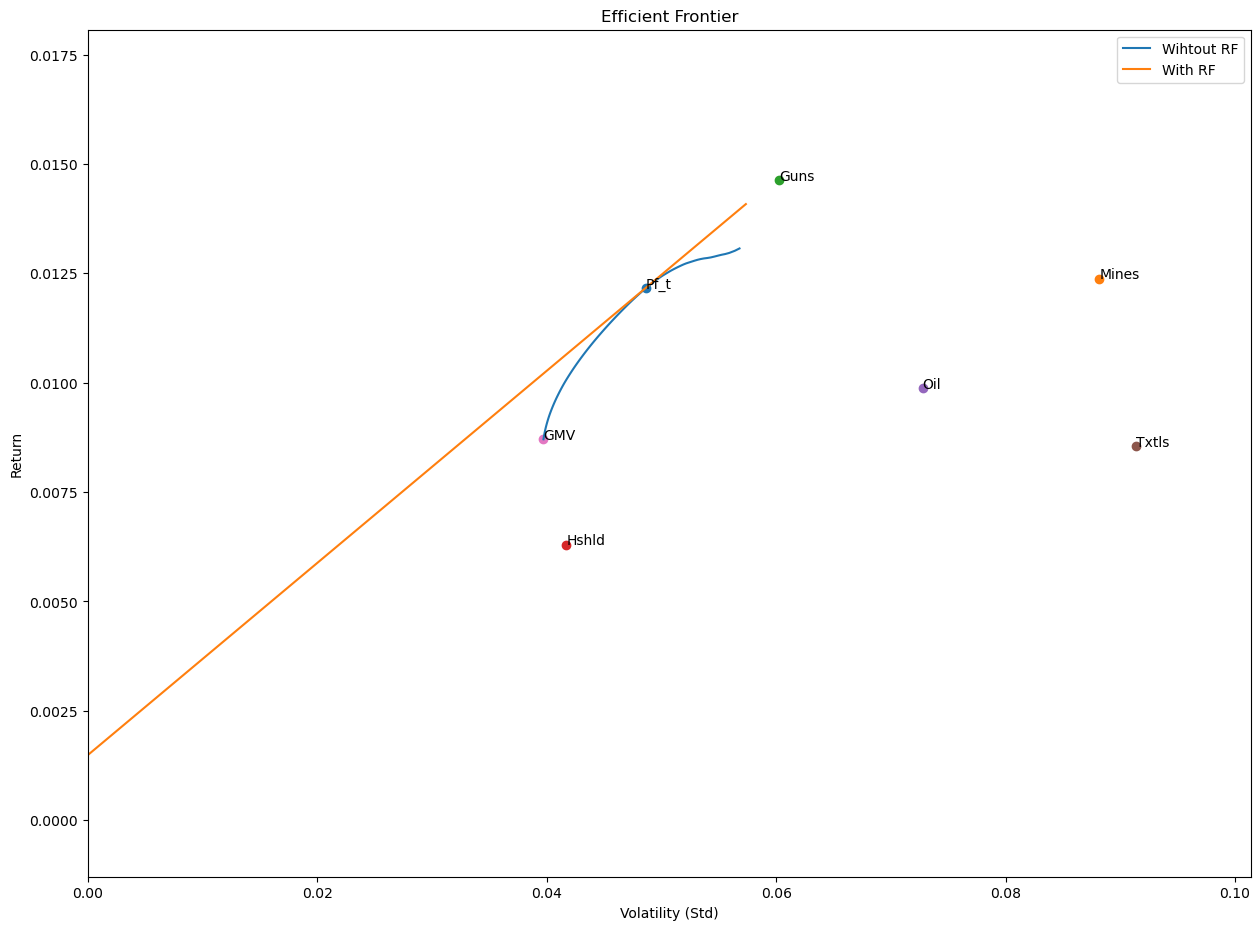

In [101]:
f.plot_Resample_ef_Gurobi(E_return, E_cov_1,result1,result2,Expected_Risk_free,show_cml=True, show_gmv=True)

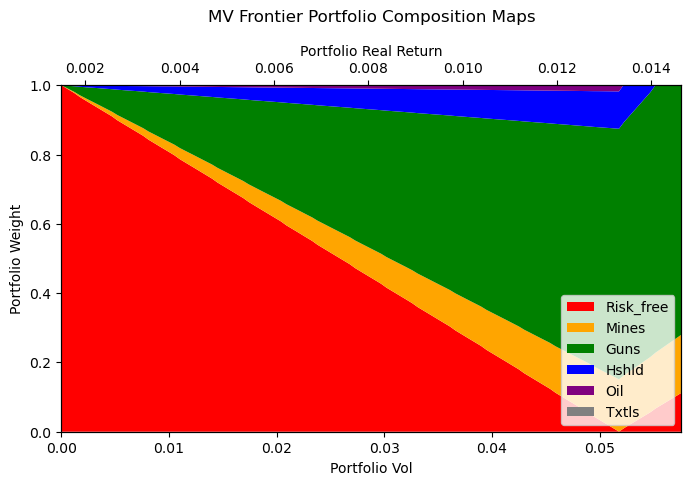

In [102]:
f.transition_map(E_return, E_cov_1,Expected_Risk_free, K, Nbr_PTF,bounds = (0,1),no_risk=False)

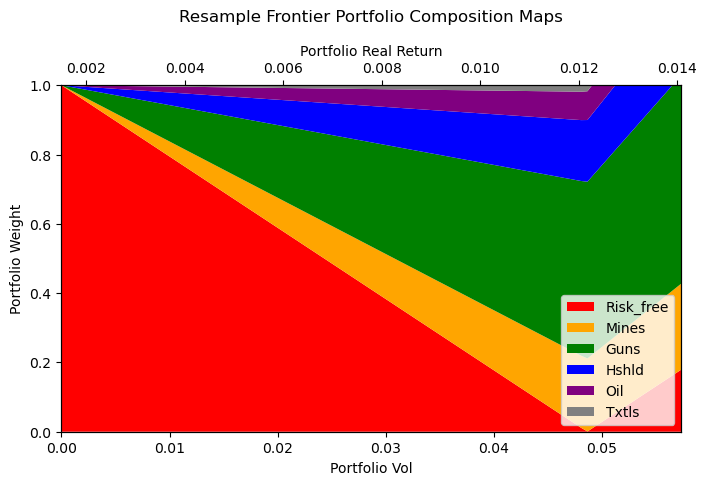

In [103]:
f.Resample_transition_map(result2, bounds = (0, 1))

### (a-1-f) Can you find a tangent portfolio under short-sale constraints? If so, describe its characteristics such as its mean and variance and the weights of each asset. Explain how the tangent portfolio has changed with the constraint¶


In [104]:
result = f.tangent_resample(result1,Expected_Risk_free)
result

,Mines,Guns,Hshld,Oil,Txtls,Return,Volatility,Sharpe
68,0.205971,0.511525,0.175615,0.083496,0.02339,0.012167,0.04865,0.219405


### (a-1-g) Repeat the same calculations in (a)-(f) adding 5 other industry portfolios to the original list of 5 industry portfolios you chose at the start. Compare the results and discuss the advantages and disadvantages of using 10 portfolios instead of 5.

In [105]:
K = 10
Resample2=f.boostrap(Data_select2,Nsim)#On genere nos simulation par Bootstraap

### a-1-g-(a) Graph the mean-variance frontier without risk-free asset of the selected 10 industry portfolios.

In [106]:
result1=f.resample_no_risk(E_return_2, E_cov_2,Resample2, K, Nbr_PTF,path_regression, bounds = (-2,2))
result2=f.resample_with_risk(E_return_2, E_cov_2,Resample2,Expected_Risk_free,K, Nbr_PTF,path_regression, bounds = (-2,2))

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:27

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:27

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:27

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:27

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:27

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:27

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

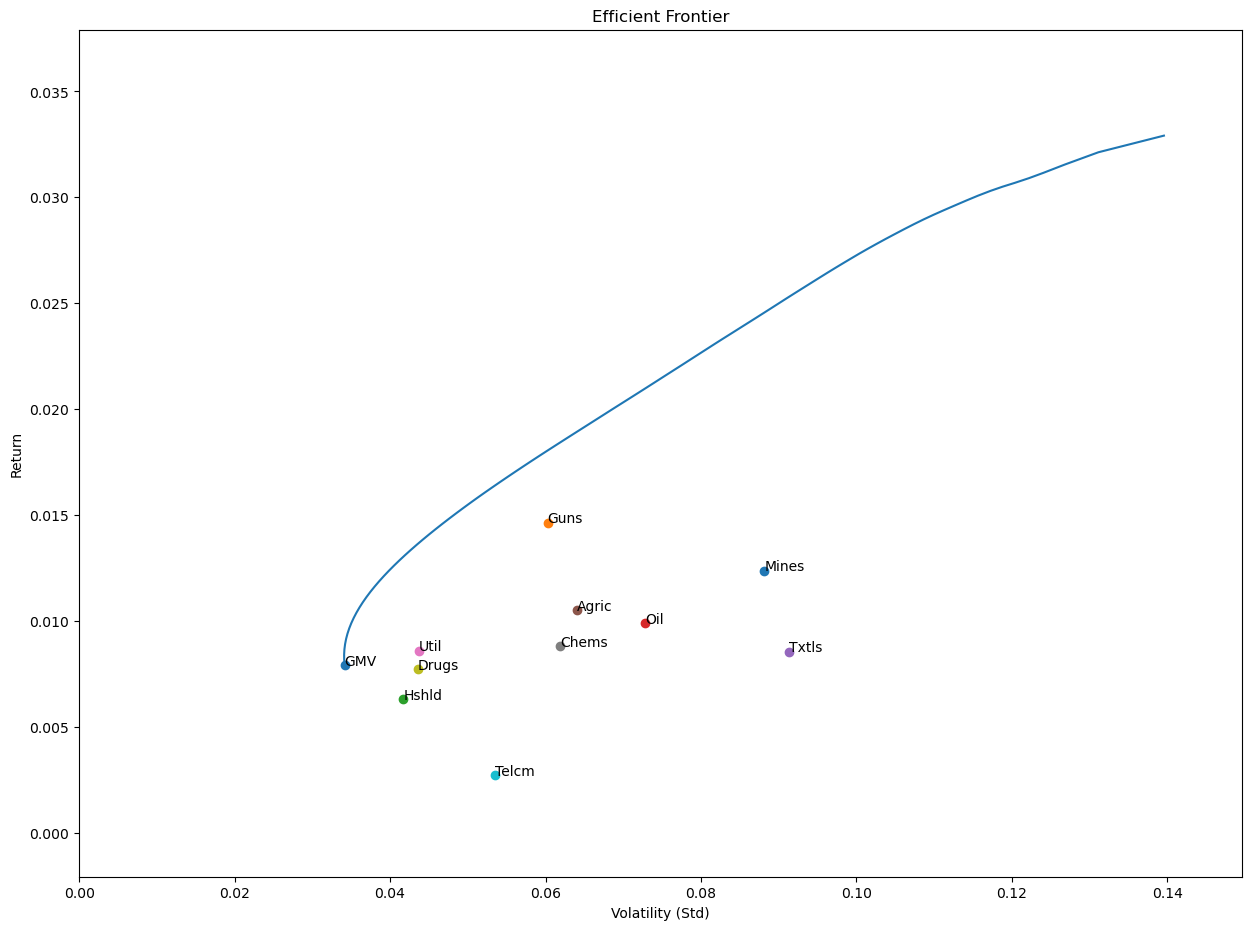

In [107]:
f.plot_Resample_ef_Gurobi(E_return_2, E_cov_2,result1,result2,Expected_Risk_free,show_cml=False, show_gmv=True)

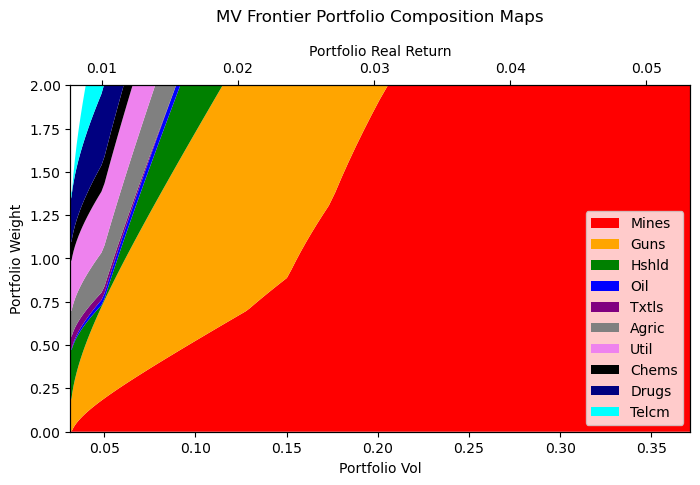

In [108]:
f.transition_map(E_return_2, E_cov_2,Expected_Risk_free, K, Nbr_PTF,bounds = (-2,2),no_risk=True)

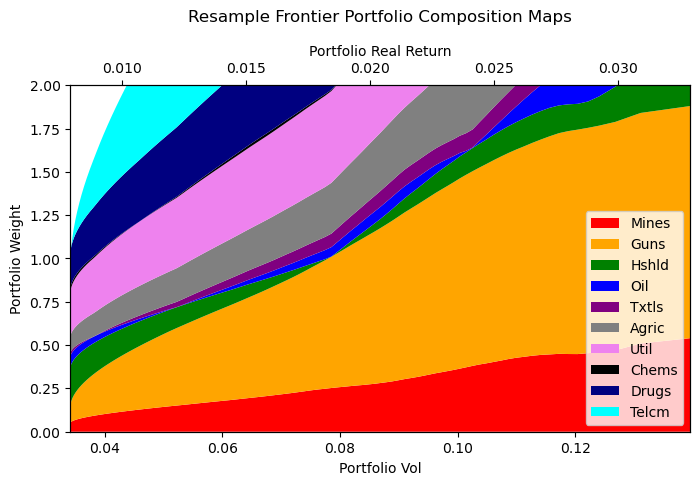

In [109]:
f.Resample_transition_map(result1,bounds = (-2,2))

### a-1-g-(b) Graph the mean-variance frontier with risk-free asset of the selected 10 industry portfolios. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the introduction of a risk-free asset.¶

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

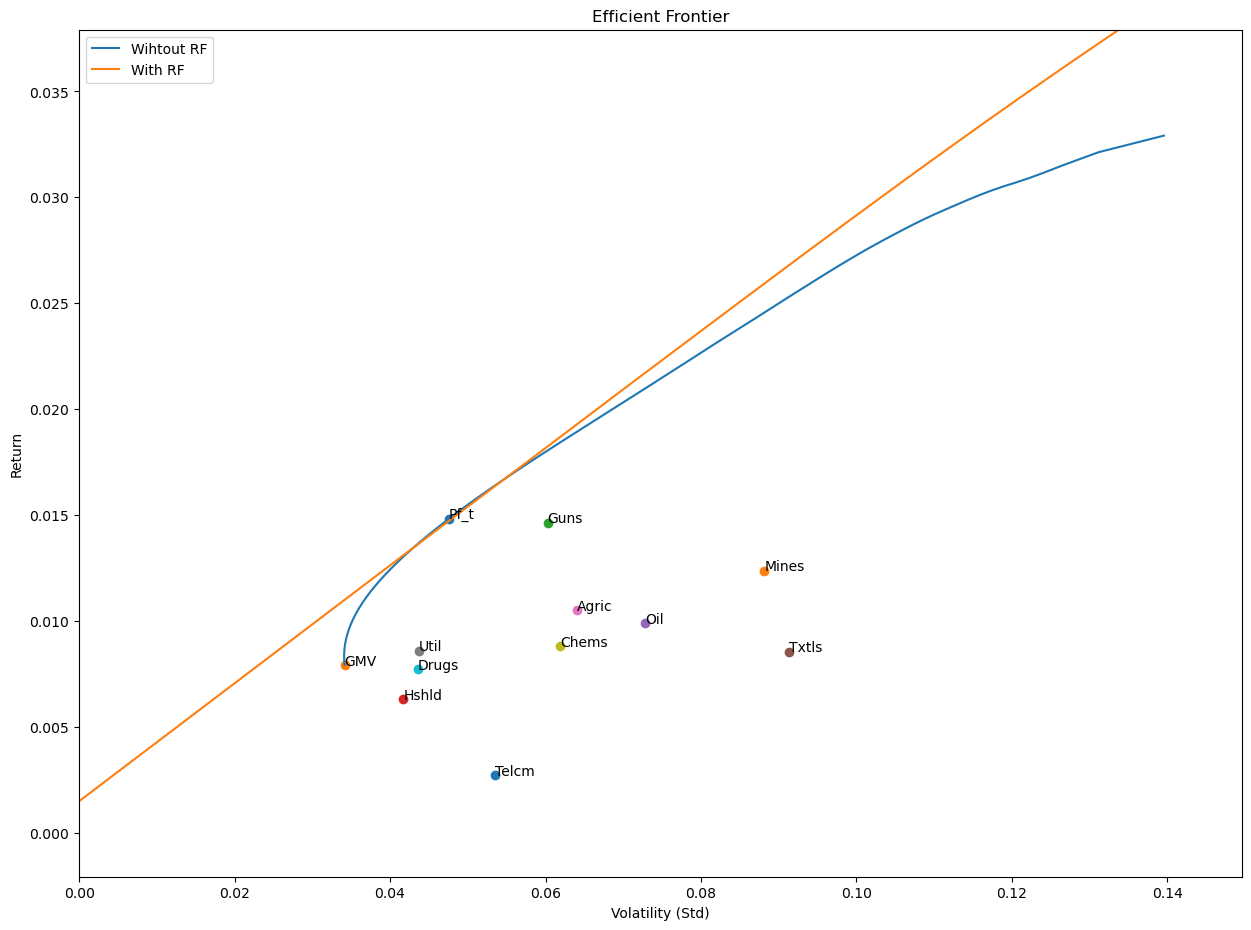

In [110]:
f.plot_Resample_ef_Gurobi(E_return_2, E_cov_2,result1,result2,Expected_Risk_free,show_cml=True, show_gmv=True)

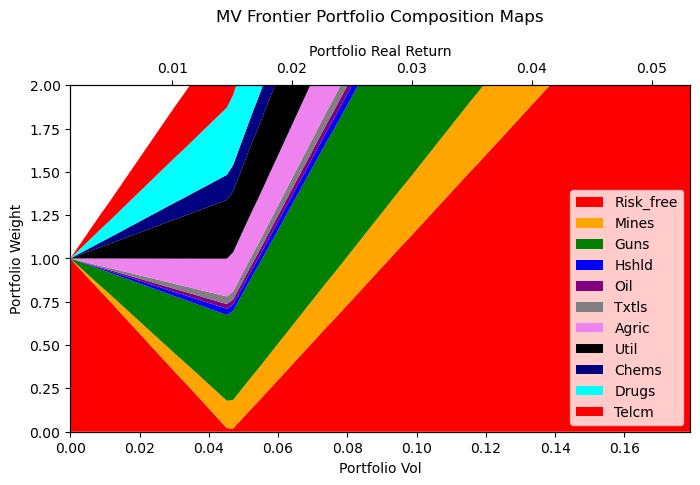

In [111]:
f.transition_map(E_return_2, E_cov_2,Expected_Risk_free, K, Nbr_PTF,bounds = (-2,2),no_risk=False)

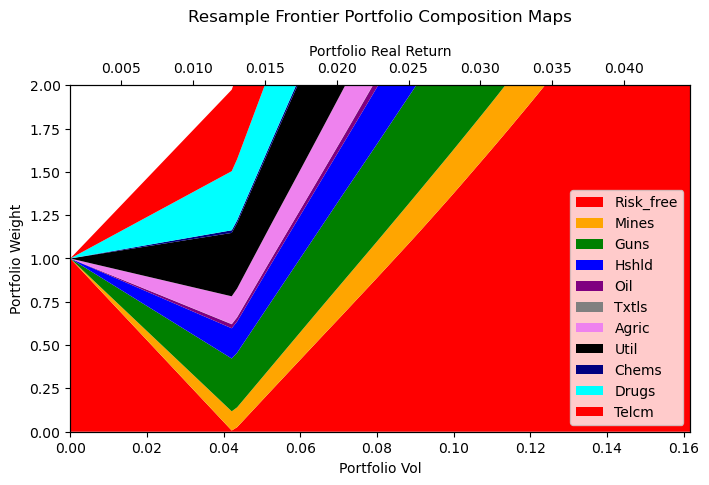

In [112]:
f.Resample_transition_map(result2, bounds = (-2,2))

### a-1-g-(c) Describe the tangent portfolio and its characteristics such as its mean and variance and the weights of each asset¶

In [113]:
result = f.tangent_resample(result1,Expected_Risk_free)

result

,Mines,Guns,Hshld,Oil,Txtls,Agric,Util,Chems,Drugs,Telcm,Return,Volatility,Sharpe
28,0.134345,0.388896,0.136712,0.010948,0.021662,0.177509,0.38116,0.001528,0.367978,-0.620742,0.014827,0.047584,0.280235


### a-1-g-(d) Graph the mean-variance frontier without risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.¶


In [114]:
result1=f.resample_no_risk(E_return_2, E_cov_2,Resample2, K, Nbr_PTF,path_regression, bounds = (0,1))
result2=f.resample_with_risk(E_return_2, E_cov_2,Resample2,Expected_Risk_free,K, Nbr_PTF,path_regression, bounds = (0,1))

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:27

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:27

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:27

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:27

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:27

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:27

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

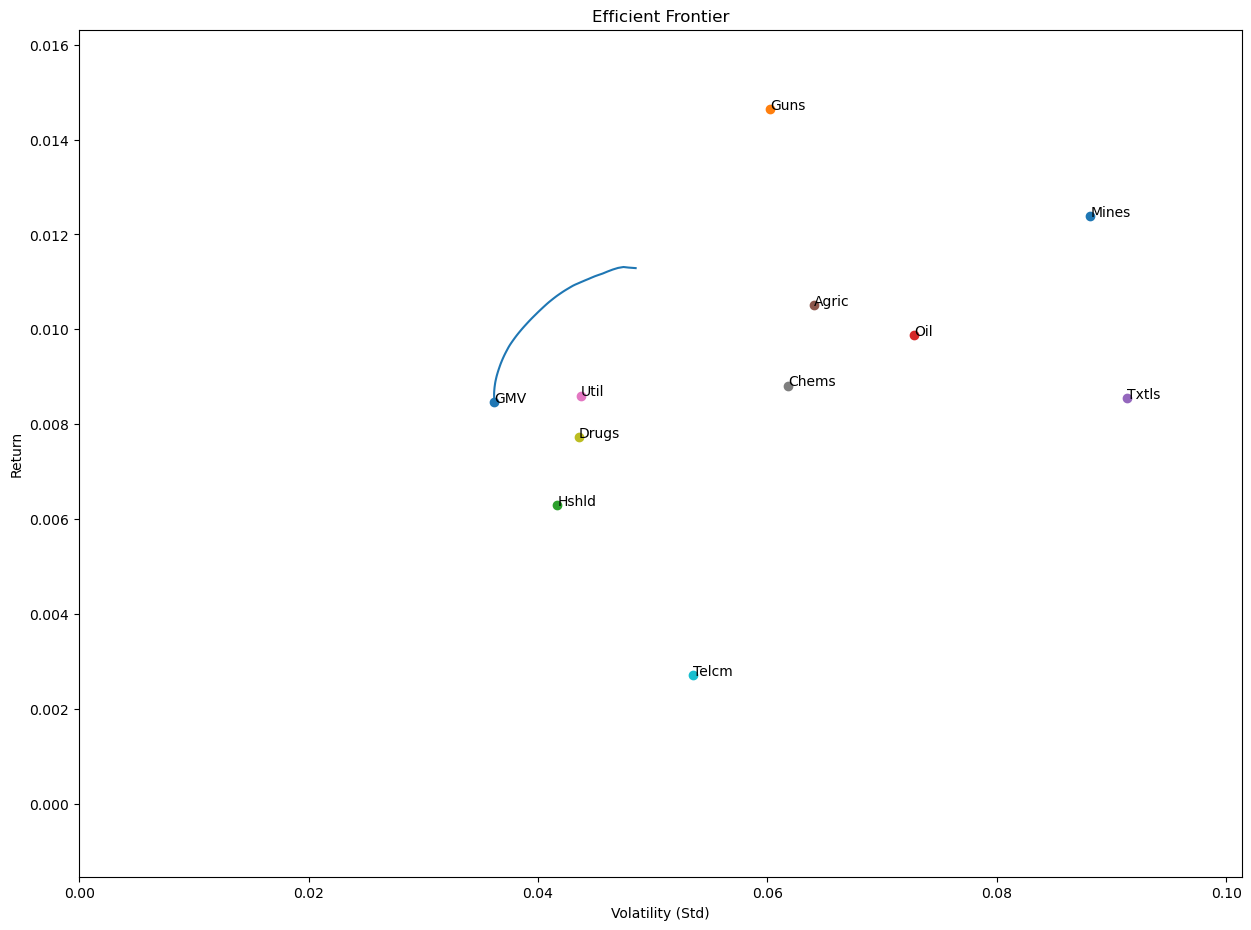

In [115]:
f.plot_Resample_ef_Gurobi(E_return_2, E_cov_2,result1,result2,Expected_Risk_free,show_cml=False, show_gmv=True)


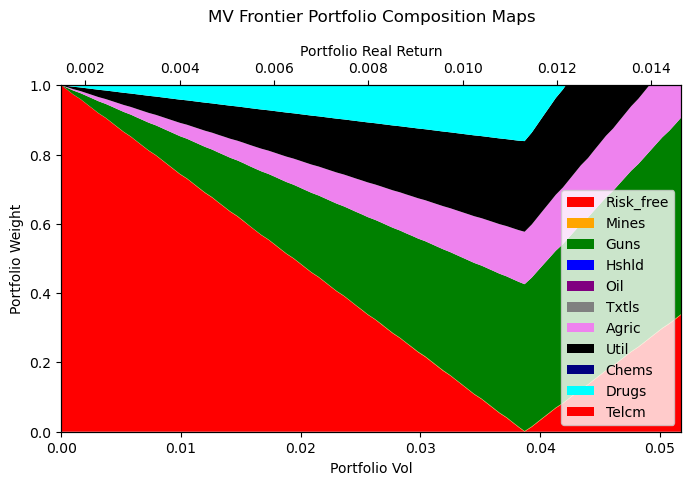

In [116]:
f.transition_map(E_return_2, E_cov_2,Expected_Risk_free, K, Nbr_PTF,bounds = (0,1),no_risk=False)

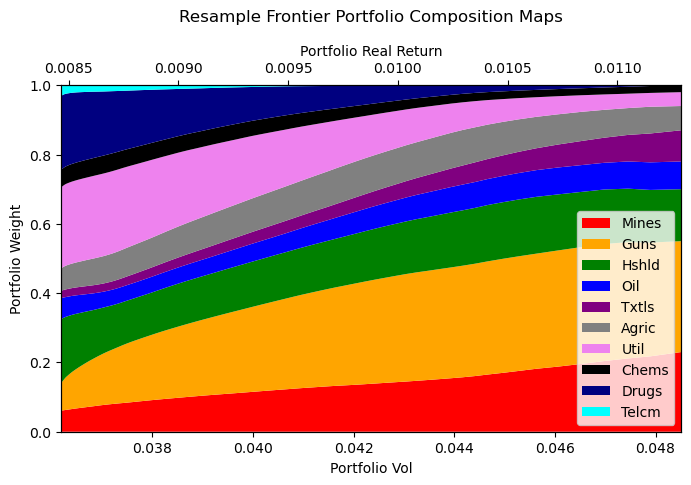

In [117]:
f.Resample_transition_map(result1,bounds = (0,1))

### a-1-g-(e) Graph the mean-variance frontier with risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.¶


<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

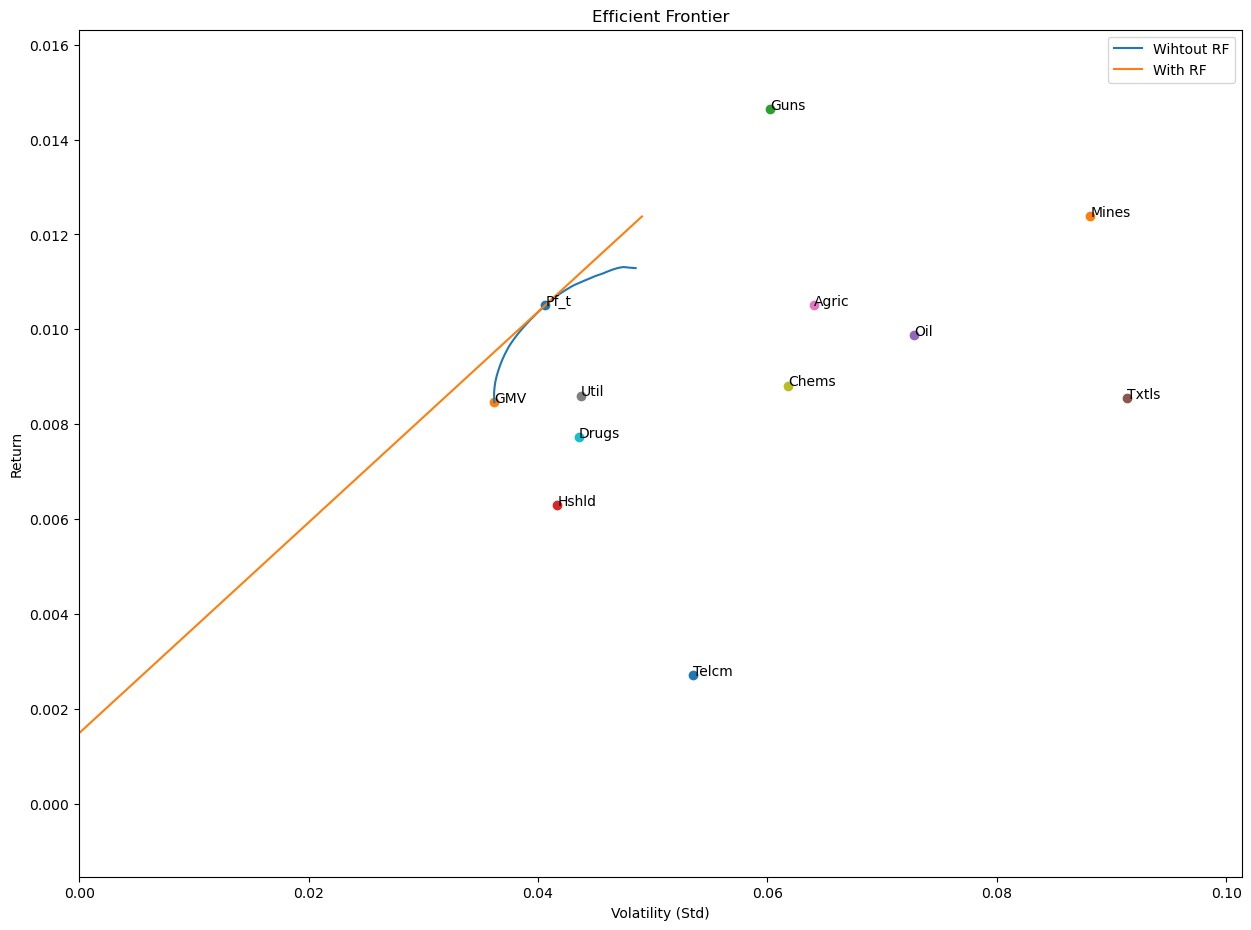

In [118]:
f.plot_Resample_ef_Gurobi(E_return_2, E_cov_2,result1,result2,Expected_Risk_free,show_cml=True, show_gmv=True)

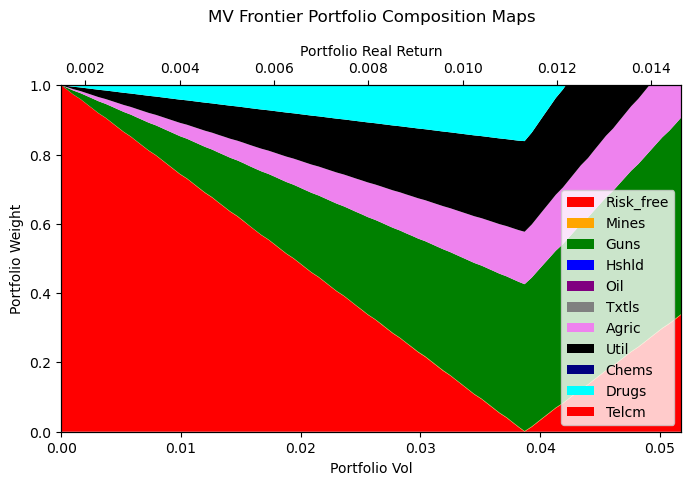

In [119]:
f.transition_map(E_return_2, E_cov_2,Expected_Risk_free, K, Nbr_PTF,bounds = (0,1),no_risk=False)

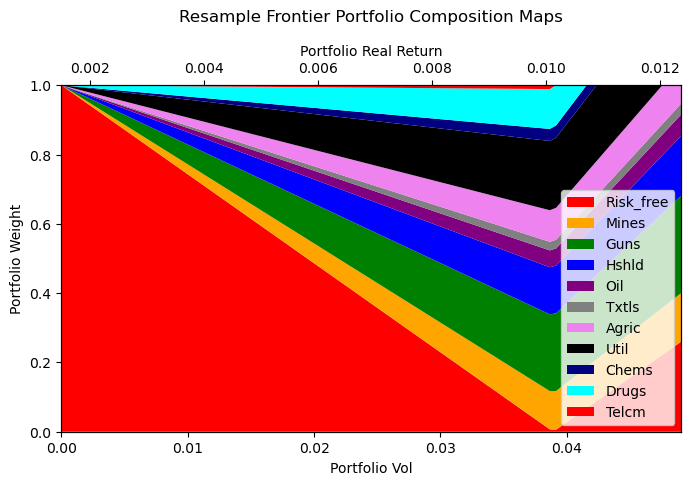

In [120]:
f.Resample_transition_map(result2, bounds = (0,1))

### a-1-g-(f) Can you find a tangent portfolio under short-sale constraints? If so, describe its characteristics such as its mean and variance and the weights of each asset. Explain how the tangent portfolio has changed with the constraint

In [121]:
result = f.tangent_resample(result1,Expected_Risk_free)

result

,Mines,Guns,Hshld,Oil,Txtls,Agric,Util,Chems,Drugs,Telcm,Return,Volatility,Sharpe
70,0.122114,0.261093,0.133874,0.054321,0.035955,0.099268,0.164699,0.04125,0.084228,0.00319,0.010504,0.040625,0.221809


### (a-1-h) The investment policy statement now limits you to invest in up to 3 industry portfolios from the original list of 5 industry portfolios. Repeat the same calculations in (a)-(f) with this additional constraint on the maximum number of assets. Is the optimal combination of assets the same for every target expected return?¶


In [122]:
K=3

### a-1-h-(a) Graph the mean-variance frontier without risk-free asset of the selected 3 industry portfolios. vs 5

In [123]:
result1=f.resample_no_risk(E_return, E_cov_1,Resample1, K, Nbr_PTF,path_regression, bounds = (-2,2))
result2=f.resample_with_risk(E_return, E_cov_1,Resample1,Expected_Risk_free,K, Nbr_PTF,path_regression, bounds = (-2,2))

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:27

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:27

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:27

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:27

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:27

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

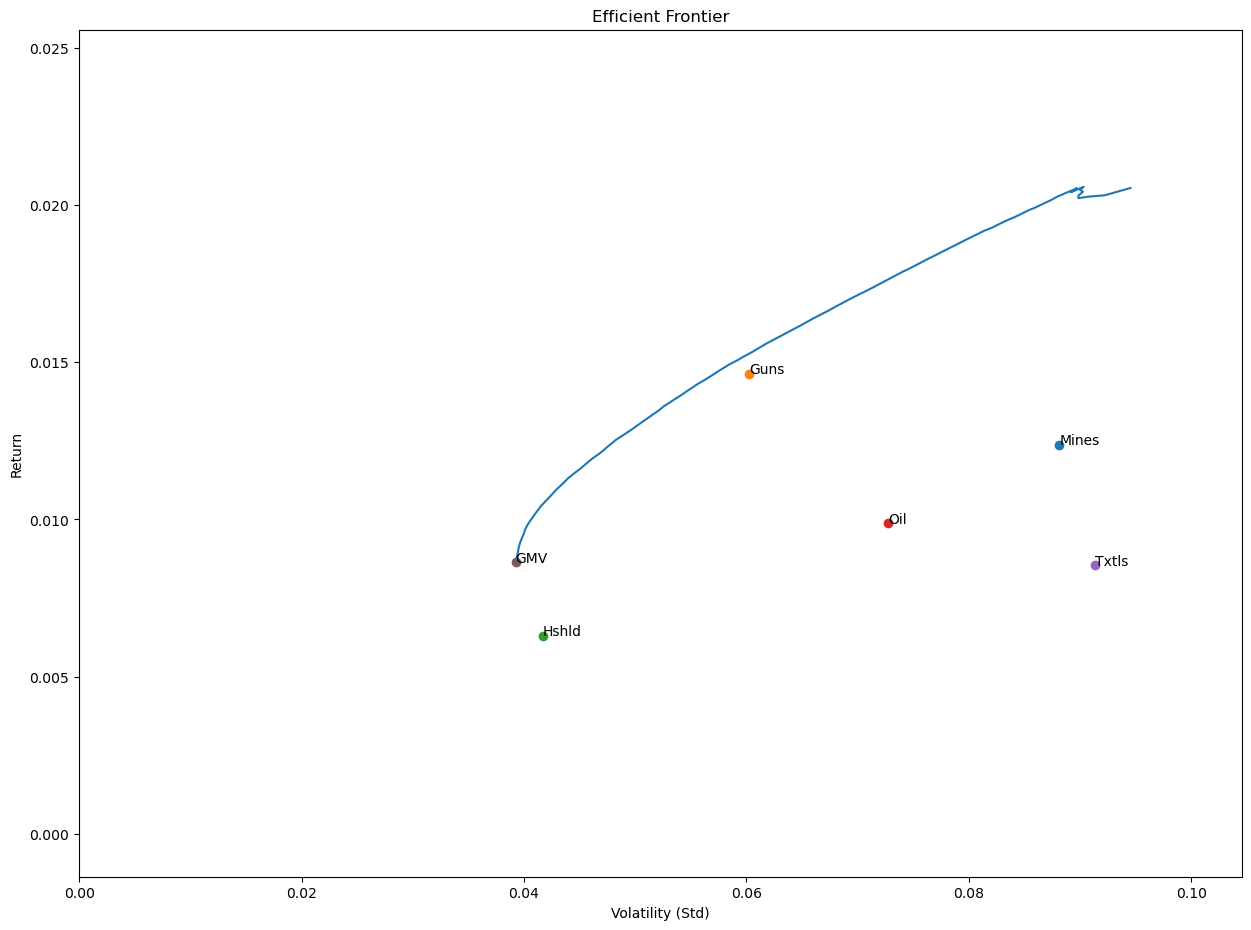

In [124]:
f.plot_Resample_ef_Gurobi(E_return, E_cov_1,result1,result2,Expected_Risk_free,show_cml=False, show_gmv=True)

### a-1-h-(b) Graph the mean-variance frontier with risk-free asset of the selected 3 industry portfolios. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the introduction of a risk-free asset.¶


<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

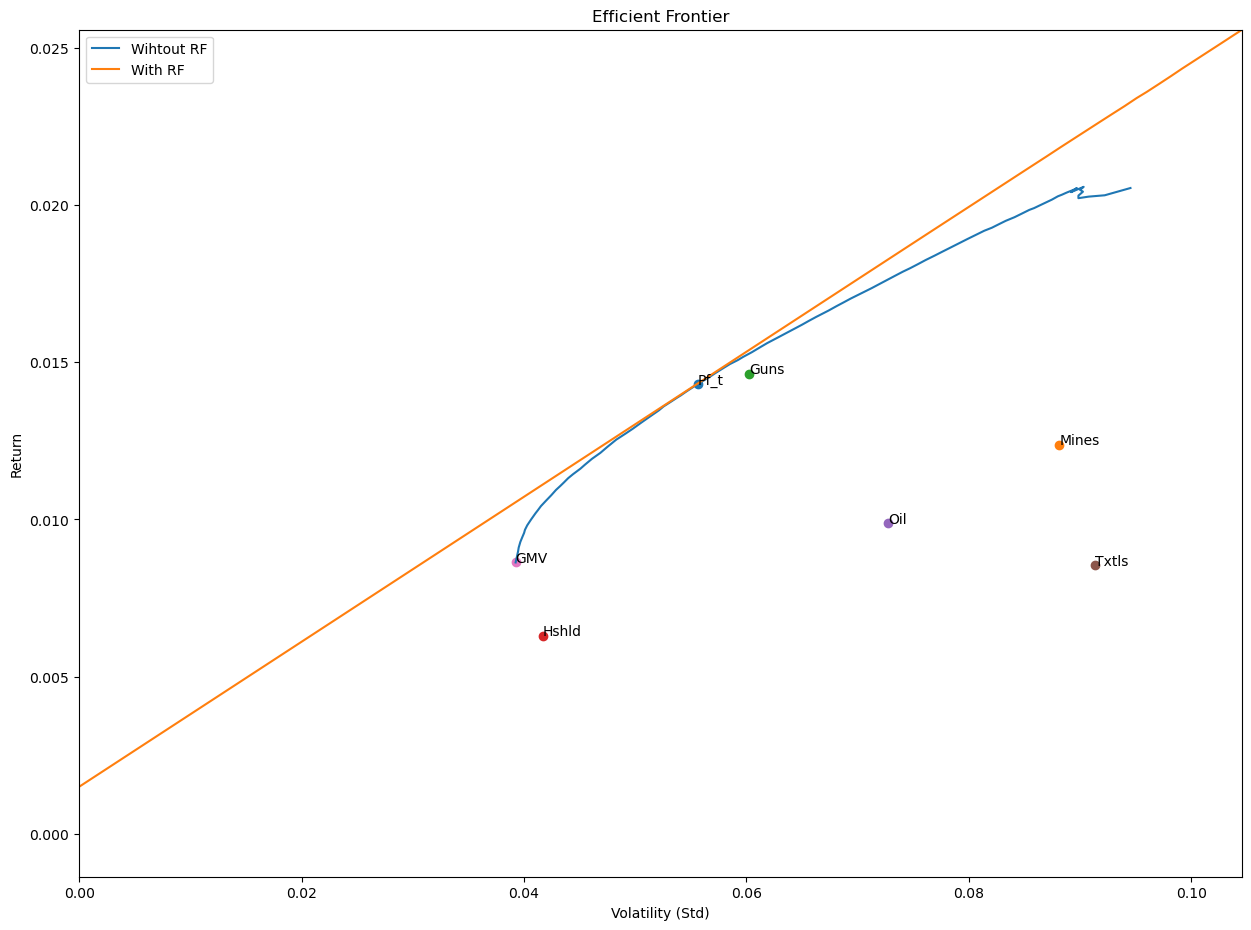

In [125]:
f.plot_Resample_ef_Gurobi(E_return, E_cov_1,result1,result2,Expected_Risk_free,show_cml=True, show_gmv=True)

### a-1-h-(c) Describe the tangent portfolio and its characteristics such as its mean and variance and the weights of each asset¶


In [126]:
#Trouver portefeuille maximum sharp ratio (Regler probleme de la fonction ou expliquer)
result = f.tangent_resample(result1,Expected_Risk_free)
result


,Mines,Guns,Hshld,Oil,Txtls,Return,Volatility,Sharpe
38,0.310102,0.760567,0.032237,0.011864,-0.114763,0.014308,0.055627,0.230383


### a-1-h-(d) Graph the mean-variance frontier without risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.¶


In [127]:
result1=f.resample_no_risk(E_return, E_cov_1,Resample1, K, Nbr_PTF,path_regression, bounds = (0,1))
result2=f.resample_with_risk(E_return, E_cov_1,Resample1,Expected_Risk_free,K, Nbr_PTF,path_regression, bounds = (0,1))

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:27

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:27

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:27

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:27

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:27

C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Data_return=Data_return.append(Data_return.iloc[-1])
C:\Users\admin\Gestion_PTF\Final\Functions.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  E_return_select = R_T['E_R'].append(E_return_mean)
C:\Users\admin\Gestion_PTF\Final\Functions.py:71

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

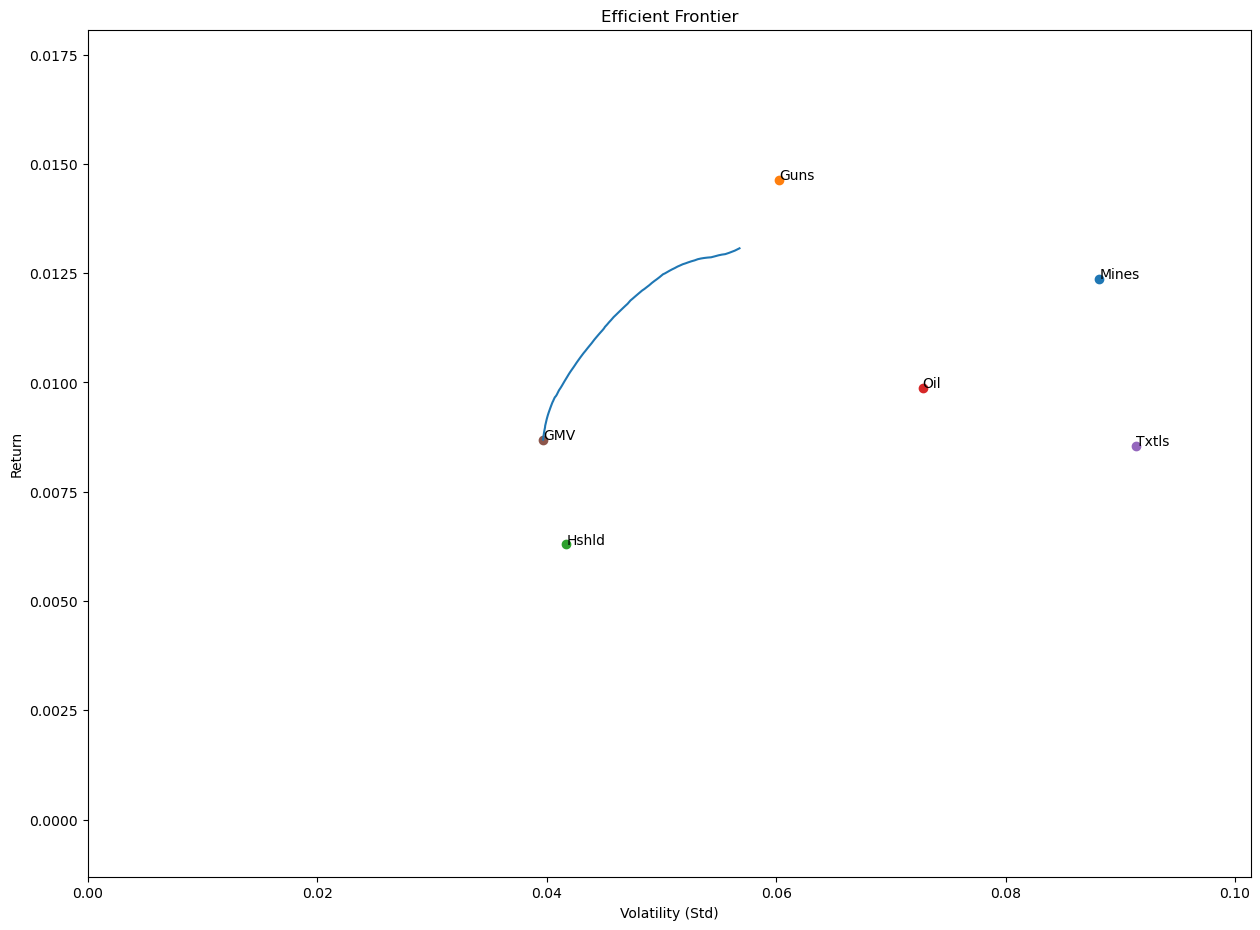

In [128]:
f.plot_Resample_ef_Gurobi(E_return, E_cov_1,result1,result2,Expected_Risk_free,show_cml=False, show_gmv=True)

### a-1-h-(e) Graph the mean-variance frontier with risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return'>

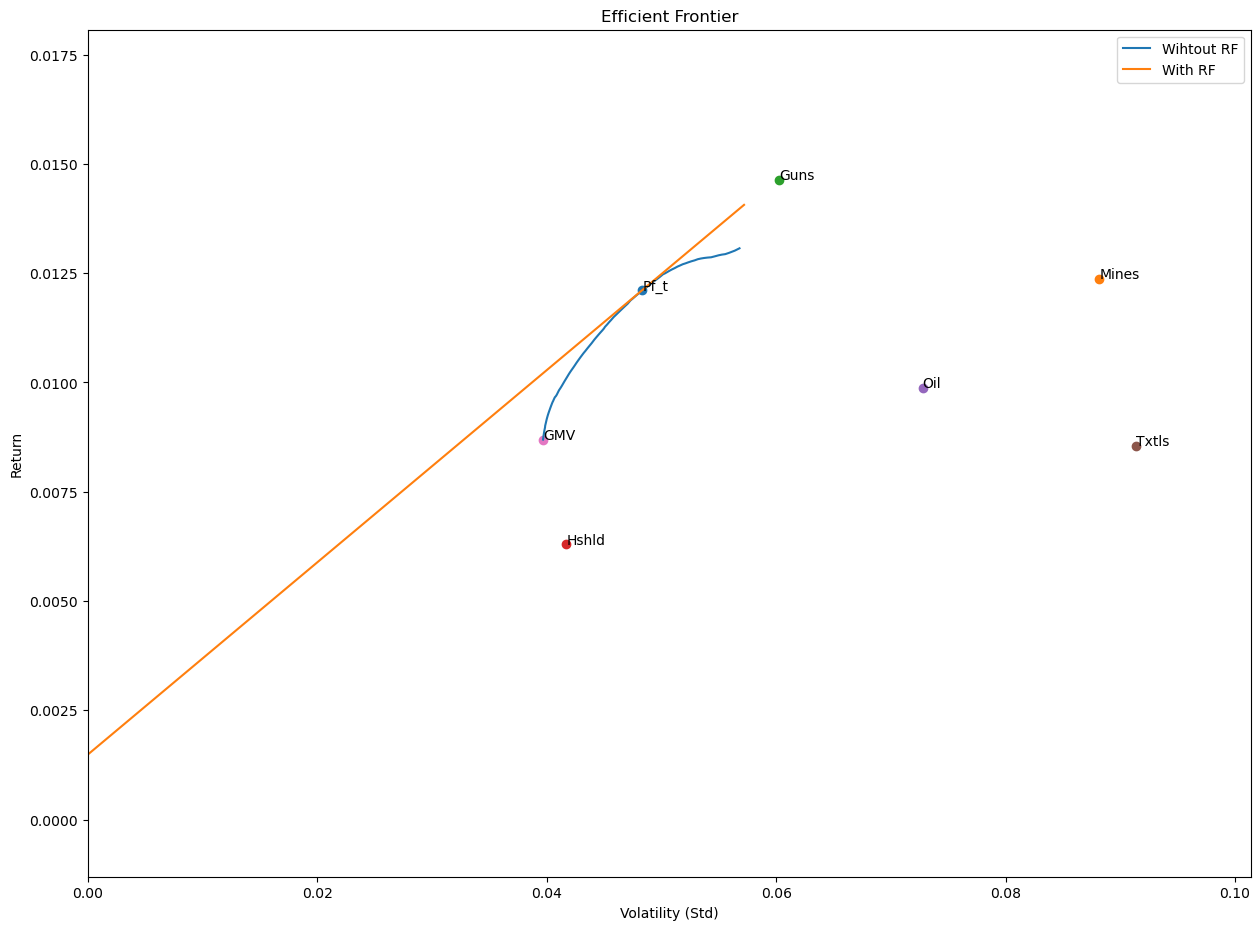

In [129]:
f.plot_Resample_ef_Gurobi(E_return, E_cov_1,result1,result2,Expected_Risk_free,show_cml=True, show_gmv=True)

### a-1-h-(f) Can you find a tangent portfolio under short-sale constraints? If so, describe its characteristics such as its mean and variance and the weights of each asset. Explain how the tangent portfolio has changed with the constraint¶


In [130]:
#Trouver portefeuille maximum sharp ratio
result = f.tangent_resample(result1,Expected_Risk_free)
result


,Mines,Guns,Hshld,Oil,Txtls,Return,Volatility,Sharpe
67,0.201759,0.50832,0.186384,0.082243,0.021292,0.012105,0.048312,0.219666


### (b) Instead of choosing 5 industries randomly as you did in Question 1, find the 5 industries among the 48 industries that maximize the Sharpe ratio with and without short selling constraints. Propose and implement methods to identify industries and their weights.

In [131]:
#Trouver portefeuille maximum sharp ratio
Data_select3 = Data
K=5
E_return_all=E_return_select
E_cov_all=f.Ledoit_wolf(Data_select3)
Resample_all=f.boostrap(Data_select3,Nsim)

In [132]:
#With Short Selling
result = f.tangent_Gurobi(E_return_all,E_cov_all,Expected_Risk_free, K, Nbr_PTF,bounds= (-2,2))
result.T


,72
Food,0.000000
Soda,0.000000
Beer,0.000000
Fun,0.000000
Books,0.000000
Clths,0.000000
Rubbr,0.000000
BldMt,0.000000
Cnstr,0.000000
Steel,0.000000


In [133]:
result.loc[:, (result != 0).any(axis=0)]

,Mach,Banks,MedEq,Chems,Trans,Return,Volatility,Sharpe
72,-2.0,-1.9733,1.5499,1.6994,1.7241,0.153761,12.073674,0.012612


In [134]:
#Without Not Short Selling
result = f.tangent_Gurobi(E_return_all,E_cov_all,Expected_Risk_free, K, Nbr_PTF,bounds= (0,1))
result

result.T


,80
Food,0.000000
Soda,0.000000
Beer,0.000000
Fun,0.000000
Books,0.000000
Clths,0.000000
Rubbr,0.000000
BldMt,0.000000
Cnstr,0.000000
Steel,0.000000


In [135]:
result.loc[:, (result != 0).any(axis=0)]

,Agric,Smoke,MedEq,Guns,Util,Return,Volatility,Sharpe
80,0.1059,0.2958,0.1083,0.3796,0.1104,0.012938,4.077388,0.002807
